SI-Model
Susceptible (S)
Infectious (I)

Mark Newman calculates ratios and the lecture calculates absolut numbers

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy.integrate import odeint

In [ ]:
def initialize_si_model(graph, initial_infected_fraction):
    num_nodes = graph.number_of_nodes()
    num_infected = int(initial_infected_fraction * num_nodes)

    infected_nodes = random.sample(graph.nodes, num_infected)

    si_model = {"graph": graph, "infected_nodes": set(infected_nodes)}

    return si_model

In [ ]:
def plot_graph(si_model, title):
    graph = si_model["graph"]
    pos = nx.spring_layout(graph)
    infected_nodes = si_model["infected_nodes"]

    nx.draw(graph, pos, with_labels=True, font_weight='bold', node_color=['red' if node in infected_nodes else 'blue' for node in graph.nodes])
    plt.title(title)
    plt.show()

In [ ]:
def run_si_model(si_model, num_steps):
    graph = si_model["graph"]
    infected_nodes = si_model["infected_nodes"]

    for step in range(num_steps):
        new_infected_nodes = set()

        for node in infected_nodes:
            neighbors = set(graph.neighbors(node))
            new_infected_nodes.update(neighbors - infected_nodes)

        infected_nodes.update(new_infected_nodes)

        print(f"Step {step + 1}: Infected Nodes - {len(infected_nodes)}")
        plot_graph(si_model, f"SI Model Simulation - Step {step + 1}")

    return si_model

<ipython-input-2-527af0bc6c6c>:5: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  infected_nodes = random.sample(graph.nodes, num_infected)


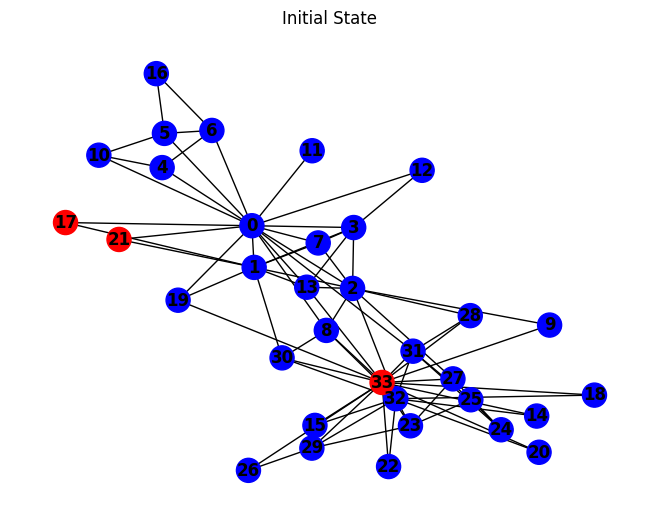

Step 1: Infected Nodes - 22


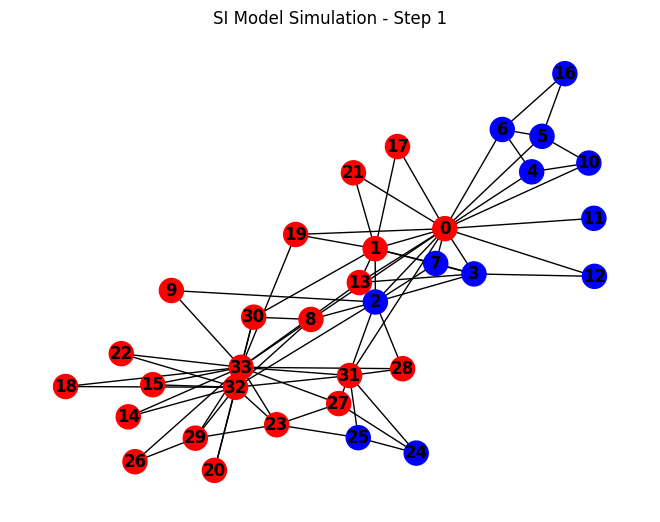

Step 2: Infected Nodes - 33


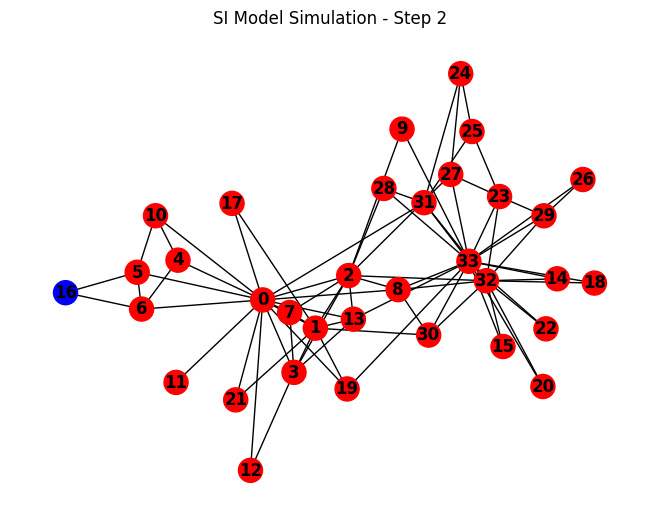

Step 3: Infected Nodes - 34


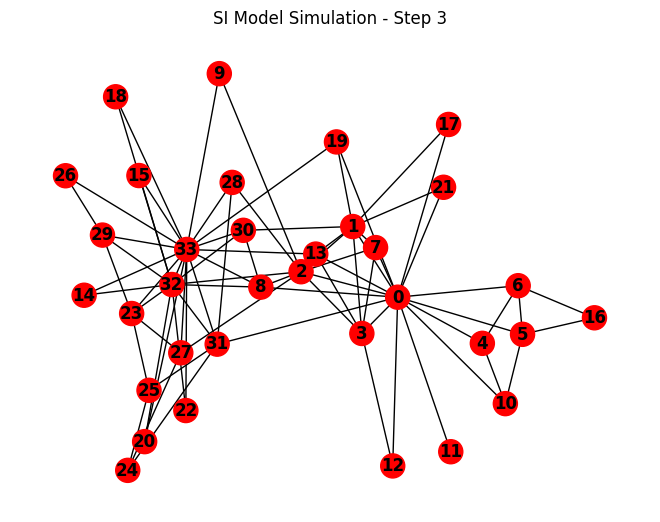

Step 4: Infected Nodes - 34


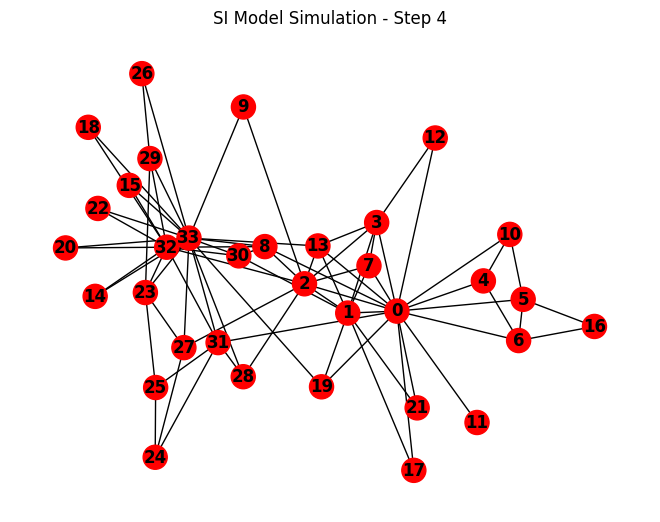

Step 5: Infected Nodes - 34


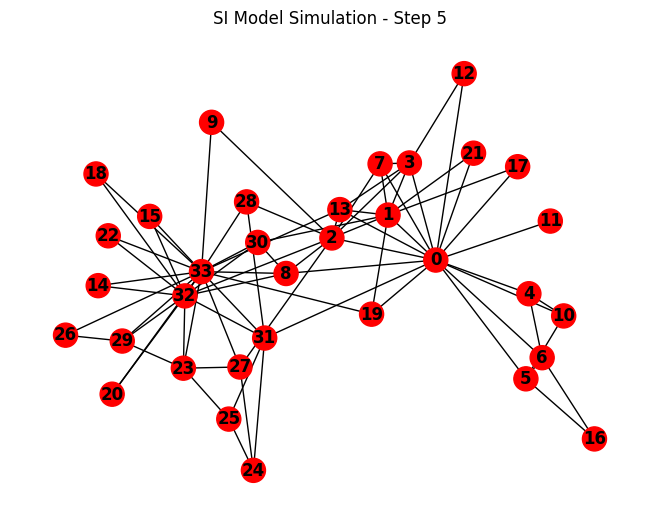

In [ ]:
if __name__ == "__main__":
    # Create karate club network
    karate_club = nx.karate_club_graph()

    # Set the initial fraction of infected nodes
    initial_infected_fraction = 0.1

    # Initialize SI model
    si_model = initialize_si_model(karate_club, initial_infected_fraction)

    # Plot the initial state of the graph
    plot_graph(si_model, "Initial State")

    # Run the SI model for a certain number of steps
    num_steps = 5
    si_model = run_si_model(si_model, num_steps)

    # Plot the final state of the graph
    #plot_graph(si_model, f"SI Model Simulation - {num_steps} Steps")

In SI,SIS and SIR models we distinguish an infectious disease like covid from diseases like cancer is that the presence of infected individuals causes additional infections. A feedback loop is createt where infected individuals cause more infections leading to exponential growth. This loop reduces the susceptible pool and limits spread.

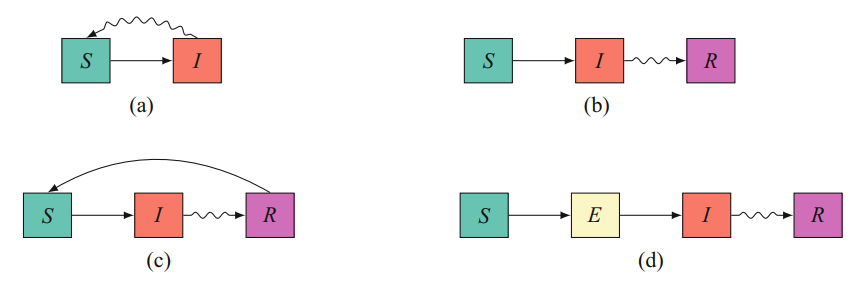
Source (Mathematics of Epidemics on Networks Page 6, slide 22)
(S) - susceptible
(E) - exposed, infected but not infectious
(I) - infected and transmitting
(R) - recovered, removed or immune
(a) SIS, (b) SIR, (c) SIRS and (d) SEIR epidemic models

the arrows represent paths along which individuals
can move between compartments and the associated fluxes are determined by details
of the transmission mechanism and recovery process (Math behind the models)

(a) simplistic view of treatable/curable sexually transmitted infections is
that individuals can either be susceptible (S) or infectious (I)

(b)diseases which confer immunity
after the first infection

(c)the
disease is seasonal or it confers short-lived immunity

(d)the latency period plays an important role and the disease
confers immunity

Math SI-Model  
S(t) : number of susceptible individuals at time t <br>
X(t) : number of infected individuals at time t <br>
β : contact rate, which represents how many contacts an infected person has with susceptible individuals per unit time <br>
n : total population  
$\frac{S}{n}$ : probability that a person is susceptible  

β * $\frac{S}{n}$ : avg contacts of an infected person with susceptible individuals per time unit

s = $\frac{S}{n}$
    
x = $\frac{X}{n}$

S + X = n  
s + x = 1  

rate of change of X :  
$\frac{dx}{dt}$ = βsx  
  
$\frac{dx}{dt}$ = β (1-x) x  
  
$\frac{dX}{dt}$ = β $\frac{SX}{n}$

rate of change of S :  
$\frac{ds}{dt}$ = - βsx  
  
$\frac{dS}{dt}$ = - β $\frac{SX}{n}$

logistic equation :  
x_{0} : x at t = 0  

x(t) = $\frac{x_{0} \ * \ e^{βt}} {1 \ - \ x_{0} \ + \ x_{0} \ * \ e^{βt}}$

<ipython-input-3-527af0bc6c6c>:5: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  infected_nodes = random.sample(graph.nodes, num_infected)


Step 1: Fraction Infected - 0.29411764705882354
Step 2: Fraction Infected - 0.7941176470588235
Step 3: Fraction Infected - 1.0
Step 4: Fraction Infected - 1.0
Step 5: Fraction Infected - 1.0


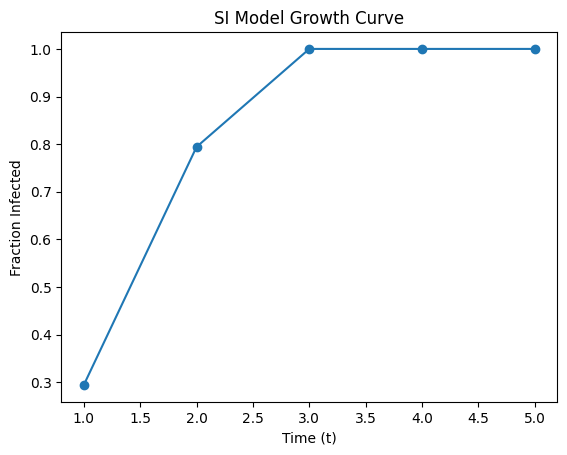

In [ ]:
# The classic logistic growth curve of the SI epidemic model
def calculate_fraction_infected(si_model):
    graph = si_model["graph"]
    infected_nodes = si_model["infected_nodes"]
    total_nodes = graph.number_of_nodes()

    fraction_infected = len(infected_nodes) / total_nodes

    return fraction_infected

def run_si_model_growth_curve(si_model, num_steps):
    fraction_infected_over_time = []

    for step in range(num_steps):
        new_infected_nodes = set()

        for node in si_model["infected_nodes"]:
            neighbors = set(si_model["graph"].neighbors(node))
            new_infected_nodes.update(neighbors - si_model["infected_nodes"])

        si_model["infected_nodes"].update(new_infected_nodes)

        fraction_infected = calculate_fraction_infected(si_model)
        fraction_infected_over_time.append(fraction_infected)

        print(f"Step {step + 1}: Fraction Infected - {fraction_infected}")

    return fraction_infected_over_time

def plot_growth_curve(fraction_infected_over_time):
    time_steps = range(1, len(fraction_infected_over_time) + 1)

    plt.plot(time_steps, fraction_infected_over_time, marker='o')
    plt.xlabel('Time (t)')
    plt.ylabel('Fraction Infected')
    plt.title('SI Model Growth Curve')
    plt.show()

if __name__ == "__main__":
    # Create karate club network
    karate_club = nx.karate_club_graph()

    # Set the initial fraction of infected nodes
    initial_infected_fraction = 0.1

    # Initialize SI model
    si_model = initialize_si_model(karate_club, initial_infected_fraction)

    # Run the SI model for a certain number of steps
    num_steps = 5
    fraction_infected_over_time = run_si_model_growth_curve(si_model, num_steps)

    # Plot the growth curve
    plot_growth_curve(fraction_infected_over_time)


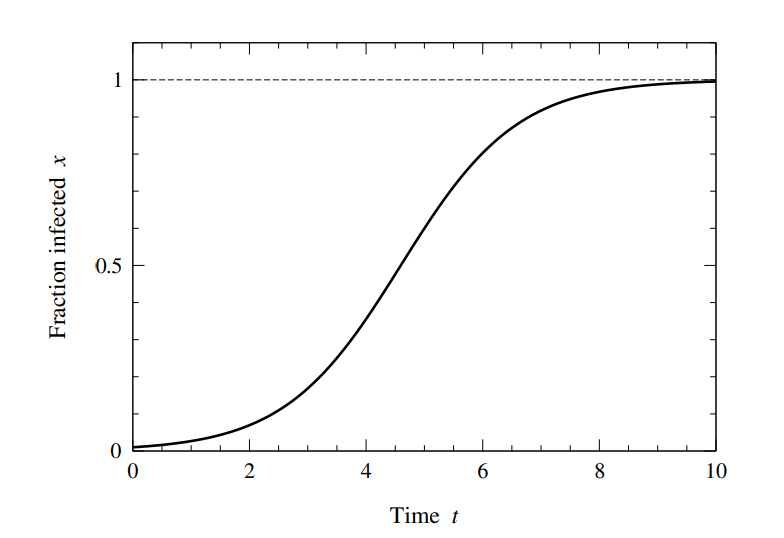

The susceptible–infected–recovered model or short SIR-model.<br>  
R - immune or dead<br>  
Math SIR-Model  <br><br>
β : contact rate, which represents how many contacts an infected person has with susceptible individuals per unit time <br>
γ : recover or die rate  

τ : length of time an infected individual remains infected before recover  
δτ probability of recovering in any time interval = γ δτ  
probability of not recovering 1 − γ δτ

probability that the individual is still infected after a total
time τ is given by
$$\lim_{{\delta \tau \to 0}} \left(1 - \gamma \delta \tau\right)^{\frac{\tau}{\delta \tau}} = e^{-\gamma \tau}$$
the probability p(τ) dτ that the individual remains infected for time τ and
then recovers in the interval between τ and τ + dτ is this quantity times γ dτ:  
$$ p(τ) dτ = γe^{-\gamma \tau}dτ $$  
  
$\frac{ds}{dt}$ = - βsx    

$\frac{dx}{dt}$ = βsx − γx

$\frac{dr}{dt}$ = γx  

s + x + r = 1  

$\frac{1}{s}$ $\frac{ds}{dt}$ = - $\frac{β}{γ}$ $\frac{dr}{dt}$  

s = $s_{0}e^\frac{-βr}{γ}$

x = 1 - s - r  

$\frac{dr}{dt}$ = γ ( 1 - r - $s_{0}e^\frac{-βr}{γ}$)  

t = $\frac{1}{γ}$ $\int_{0}^r$ $\frac{du}{1 \ - \ u  \ - \ s_{0}e^\frac{-βu}{γ} }$

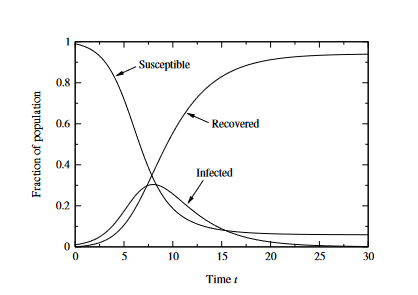
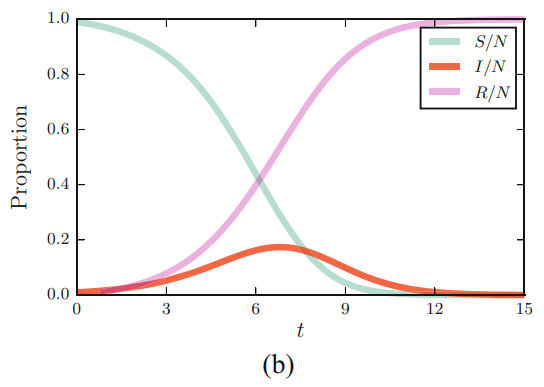

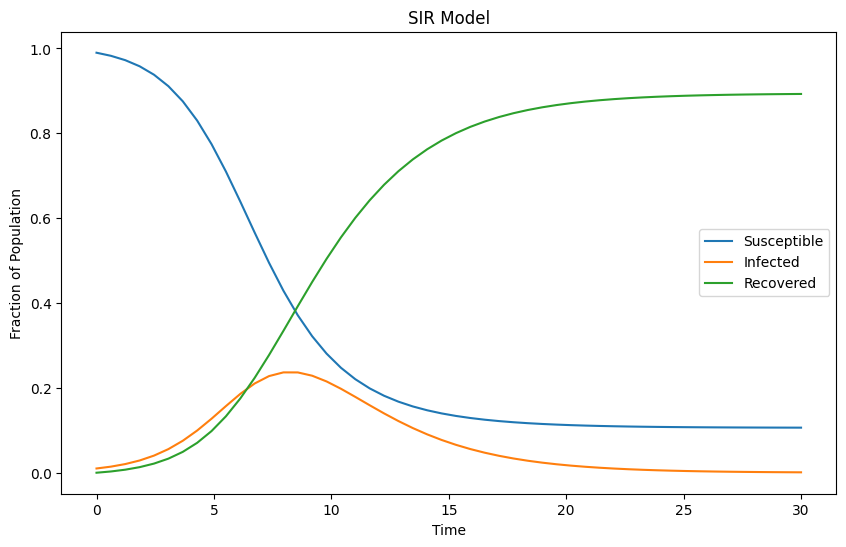

In [ ]:
# Define the SIR model equations
def sir_model(y, t, beta, gamma):
    s, x, r = y
    dsdt = -beta * s * x
    dxdt = beta * s * x - gamma * x
    drdt = gamma * x
    return [dsdt, dxdt, drdt]

# Set the initial conditions and parameters
s0 = 0.99
x0 = 0.01
r0 = 0.0
beta = 1.0
gamma = 0.4

# Set the time points
t = np.linspace(0, 30)
# Solve the SIR equations using odeint
solution = odeint(sir_model, [s0, x0, r0], t, args=(beta, gamma))

# Extract the results for each state
susceptible, infected, recovered = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, susceptible, label='Susceptible')
plt.plot(t, infected, label='Infected')
plt.plot(t, recovered, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Fraction of Population')
plt.title('SIR Model')
plt.legend()
plt.show()


Susceptible that don't get infected and survive long enough without being ingected will probably never be infected at all thats why the Recovered fraction never reaches one

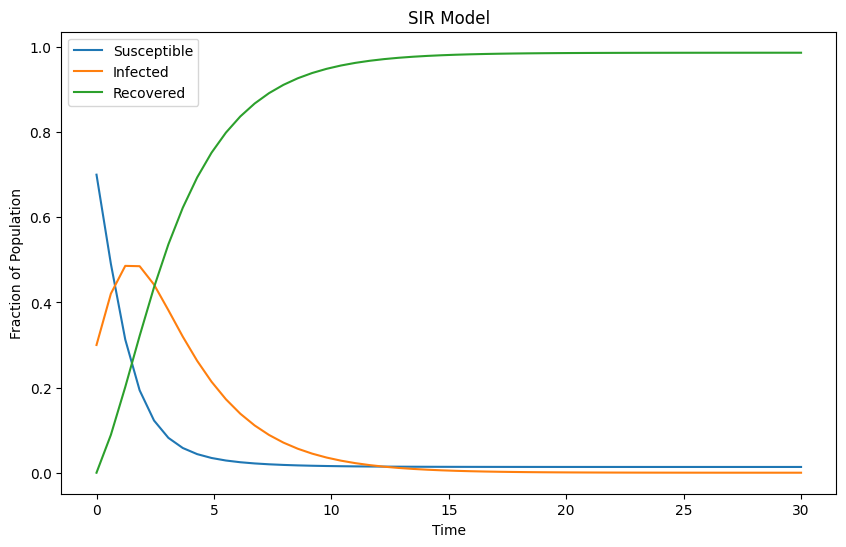

In [ ]:
# Define the SIR model equations
def sir_model(y, t, beta, gamma):
    s, x, r = y
    dsdt = -beta * s * x
    dxdt = beta * s * x - gamma * x
    drdt = gamma * x
    return [dsdt, dxdt, drdt]

# Set the initial conditions and parameters
s0 = 0.70
x0 = 0.30
r0 = 0.0
beta = 1.6
gamma = 0.4

# Set the time points
t = np.linspace(0, 30)
# Solve the SIR equations using odeint
solution = odeint(sir_model, [s0, x0, r0], t, args=(beta, gamma))

# Extract the results for each state
susceptible, infected, recovered = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, susceptible, label='Susceptible')
plt.plot(t, infected, label='Infected')
plt.plot(t, recovered, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Fraction of Population')
plt.title('SIR Model')
plt.legend()

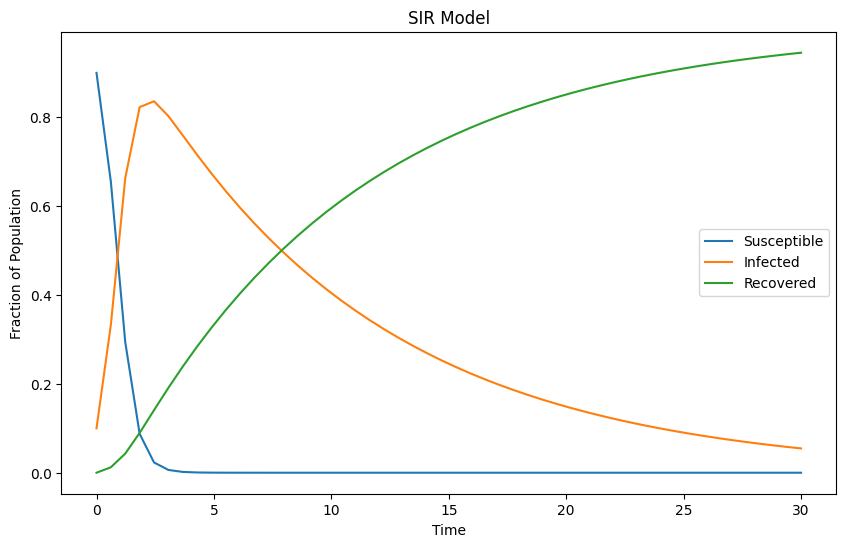

In [ ]:
# Define the SIR model equations
def sir_model(y, t, beta, gamma):
    s, x, r = y
    dsdt = -beta * s * x
    dxdt = beta * s * x - gamma * x
    drdt = gamma * x
    return [dsdt, dxdt, drdt]

# Set the initial conditions and parameters
s0 = 0.90
x0 = 0.10
r0 = 0.0
beta = 2.6
gamma = 0.1

# Set the time points
t = np.linspace(0, 30)
# Solve the SIR equations using odeint
solution = odeint(sir_model, [s0, x0, r0], t, args=(beta, gamma))

# Extract the results for each state
susceptible, infected, recovered = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, susceptible, label='Susceptible')
plt.plot(t, infected, label='Infected')
plt.plot(t, recovered, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Fraction of Population')
plt.title('SIR Model')
plt.legend()

In this particular example, once nodes have recovered, they do not infect others. However, this model can be modified to allow for the possibility that the virus continues to spread within the same timeframe, even after nodes have recovered. This adjustment would reflect a scenario where recovered individuals can still transmit the virus.

In [ ]:
def initialize_sir_model(graph, initial_infected_fraction):
    num_nodes = graph.number_of_nodes()
    num_infected = int(initial_infected_fraction * num_nodes)

    infected_nodes = random.sample(graph.nodes, num_infected)
    susceptible_nodes = set(graph.nodes) - set(infected_nodes)
    recovered_nodes = set()

    sir_model = {"graph": graph, "infected_nodes": set(infected_nodes), "susceptible_nodes": set(susceptible_nodes), "recovered_nodes": set(recovered_nodes)}

    return sir_model

def plot_sir_graph(sir_model, title):
    graph = sir_model["graph"]
    pos = nx.spring_layout(graph)
    infected_nodes = sir_model["infected_nodes"]
    susceptible_nodes = sir_model["susceptible_nodes"]
    recovered_nodes = sir_model["recovered_nodes"]

    nx.draw(graph, pos, with_labels=True, font_weight='bold', node_color=['red' if node in infected_nodes else 'green' if node in recovered_nodes else 'blue' for node in graph.nodes])
    plt.title(title)
    plt.show()

def run_sir_model(sir_model, num_steps, beta, gamma):
    graph = sir_model["graph"]
    infected_nodes = sir_model["infected_nodes"]
    susceptible_nodes = sir_model["susceptible_nodes"]
    recovered_nodes = sir_model["recovered_nodes"]

    for step in range(num_steps):
        new_infected_nodes = set()
        new_recovered_nodes = set()
        # 1 / gamma to have steps till recovery
        for node in infected_nodes:
            if random.random() <= gamma:
                new_recovered_nodes.add(node)
                recovered_nodes.update(new_recovered_nodes)
                continue

            neighbors = set(graph.neighbors(node)) - recovered_nodes
            num_neighbors_to_infect = min(int(beta), len(neighbors))

            neighbors_to_infect = random.sample(neighbors, num_neighbors_to_infect)
            new_infected_nodes.update(neighbors_to_infect)

        infected_nodes.update(new_infected_nodes)
        infected_nodes -= new_recovered_nodes


        print(f"Step {step + 1}: Infected Nodes - {len(infected_nodes)}")
        plot_sir_graph(sir_model, f"SIR Model Simulation - Step {step + 1}")

    return sir_model

if __name__ == "__main__":
    # Create a graph (replace this with your specific graph creation logic)
    karate_club = nx.karate_club_graph()

    # Set the initial fraction of infected nodes
    initial_infected_fraction = 0.1

    # Initialize SIR model
    sir_model = initialize_sir_model(karate_club, initial_infected_fraction)

    # Plot the initial state of the graph
    plot_sir_graph(sir_model, "Initial State")

    # Run the SIR model for a certain number of steps
    num_steps = 30
    beta = 2.6
    gamma = 0.2
    sir_model = run_sir_model(sir_model, num_steps, beta, gamma)

Output hidden; open in https://colab.research.google.com to view.

The susceptible–infected–susceptible model or short SIS-model.<br>  
  
$\frac{ds}{dt}$ = γx - βsx    

$\frac{dx}{dt}$ = βsx − γx

s + x = 1  
s = 1 − x  

$\frac{dx}{dt}$ = βsx − γx $\longrightarrow$
$\frac{dx}{dt}$ = β(1 − x)x − γx $\longrightarrow$
$\frac{dx}{dt}$ = (β − βx)x − γx $\longrightarrow$
$\frac{dx}{dt}$ = (β − βx - γ)x $\longrightarrow$
$\frac{dx}{dt}$ = (β - γ - βx)x
  
integration constant C:  
x(t) = (1 − $\frac{γ}{β}$) $\frac{C e^{(β - γ)t}}{1 + Ce^{(β - γ)t}}$  
C = $\frac{βx_{0}}{β - γ - βx_{0}}$  
In the case of a large population and a small number of initial carriers of the
disease, x0 is small and C is well approximated as βx0/(β − γ)

x(t) =  $x_0$ $\frac{(β - γ)  e^{(β - γ)t}}{β - γ + βx_0e^{(β - γ)t}}$  


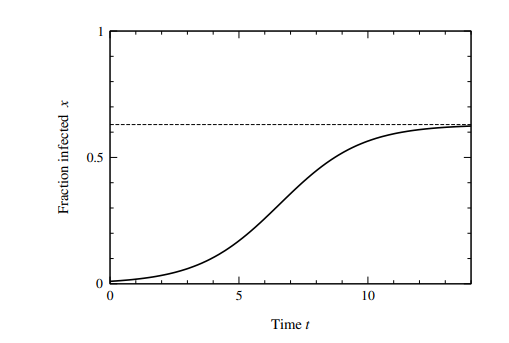

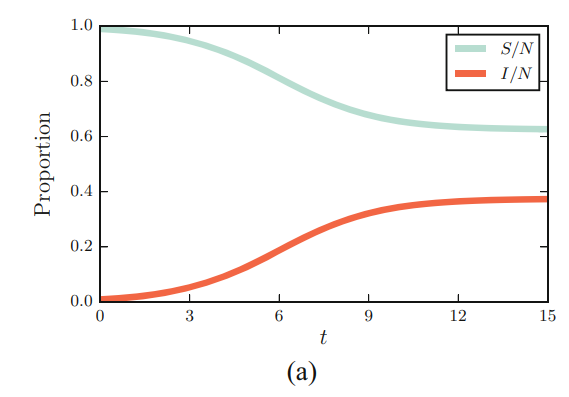

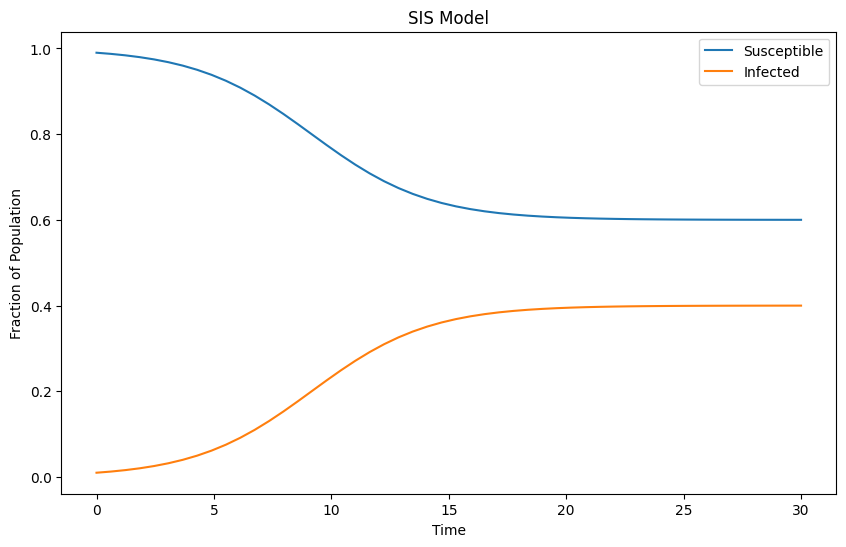

In [ ]:
# Define the SIS model equations
def sis_model(y, t, beta, gamma):
    s, x = y
    dsdt = gamma * x - beta * s * x
    dxdt = beta * s * x - gamma * x
    return [dsdt, dxdt]

# Set the initial conditions and parameters
s0 = 0.99
x0 = 0.01
beta = 1.0
gamma = 0.6

# Set the time points
t = np.linspace(0, 30)

# Solve the SIS equations using odeint
solution = odeint(sis_model, [s0, x0], t, args=(beta, gamma))

# Extract the results for each state
susceptible, infected = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, susceptible, label='Susceptible')
plt.plot(t, infected, label='Infected')
plt.xlabel('Time')
plt.ylabel('Fraction of Population')
plt.title('SIS Model')
plt.legend()
plt.show()

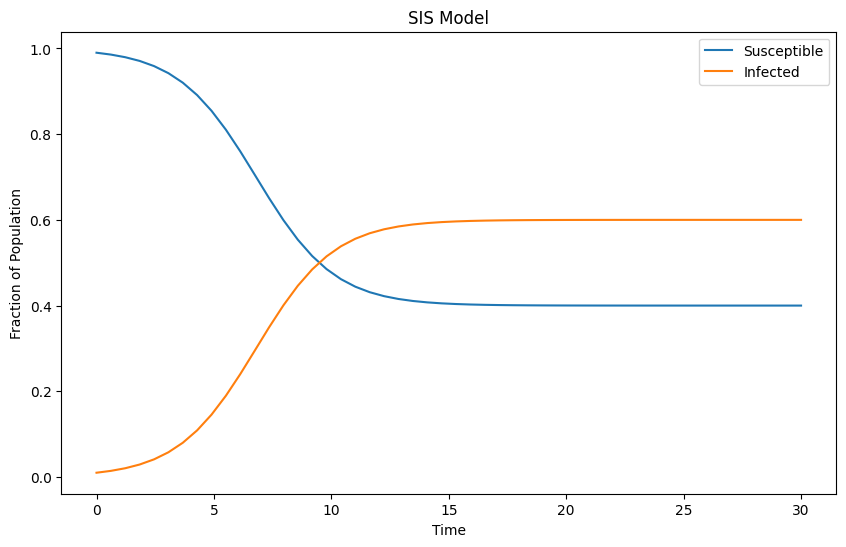

In [ ]:
# Define the SIS model equations
def sis_model(y, t, beta, gamma):
    s, x = y
    dsdt = gamma * x - beta * s * x
    dxdt = beta * s * x - gamma * x
    return [dsdt, dxdt]

# Set the initial conditions and parameters
s0 = 0.99
x0 = 0.01
beta = 1.0
gamma = 0.4

# Set the time points
t = np.linspace(0, 30)

# Solve the SIS equations using odeint
solution = odeint(sis_model, [s0, x0], t, args=(beta, gamma))

# Extract the results for each state
susceptible, infected = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, susceptible, label='Susceptible')
plt.plot(t, infected, label='Infected')
plt.xlabel('Time')
plt.ylabel('Fraction of Population')
plt.title('SIS Model')
plt.legend()
plt.show()

<ipython-input-50-b7667782f7f1>:5: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  infected_nodes = random.sample(graph.nodes, num_infected)


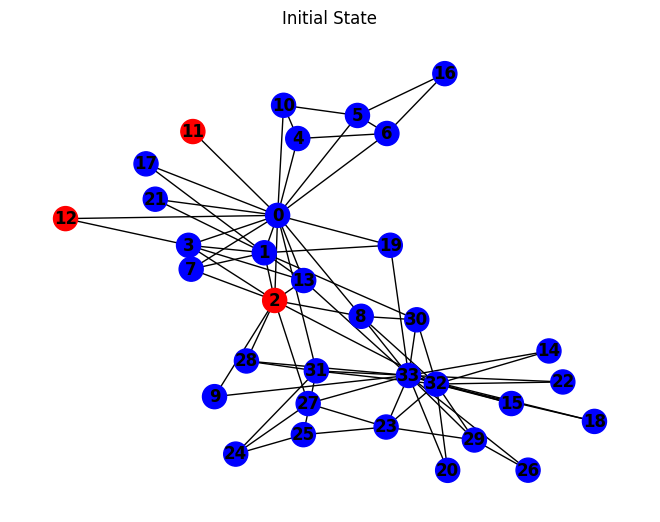

<ipython-input-50-b7667782f7f1>:40: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  neighbors_to_infect = random.sample(neighbors, num_neighbors_to_infect)


Step 1: Infected Nodes - 4


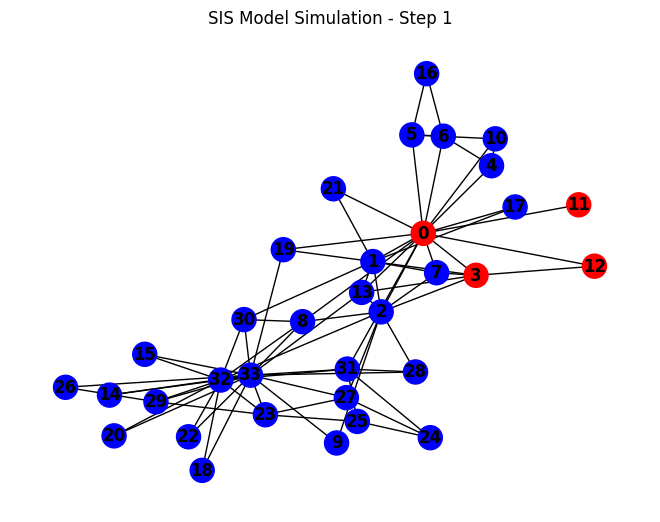

Step 2: Infected Nodes - 3
Step 3: Infected Nodes - 7
Step 4: Infected Nodes - 12
Step 5: Infected Nodes - 10


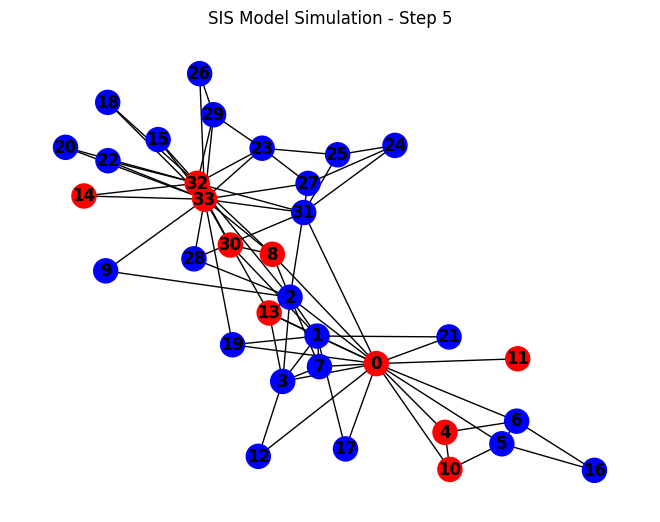

Step 6: Infected Nodes - 17
Step 7: Infected Nodes - 19
Step 8: Infected Nodes - 18
Step 9: Infected Nodes - 18
Step 10: Infected Nodes - 18


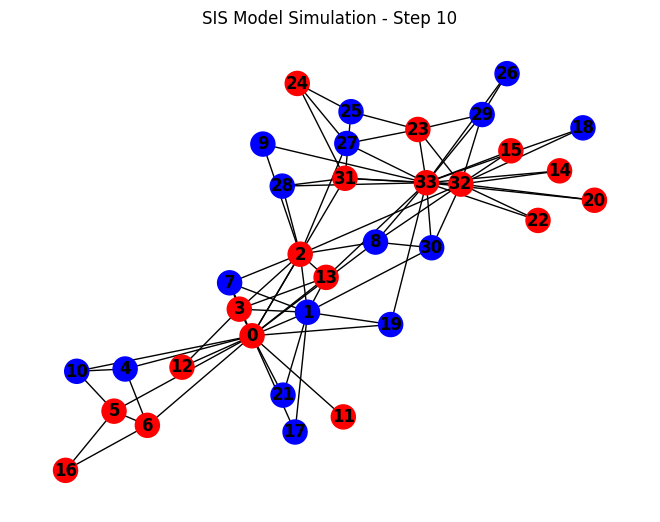

Step 11: Infected Nodes - 16
Step 12: Infected Nodes - 17
Step 13: Infected Nodes - 15
Step 14: Infected Nodes - 15
Step 15: Infected Nodes - 12


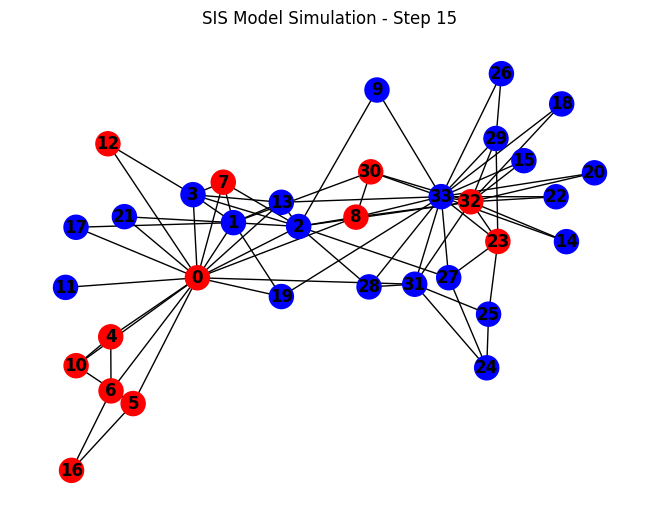

Step 16: Infected Nodes - 12
Step 17: Infected Nodes - 21
Step 18: Infected Nodes - 12
Step 19: Infected Nodes - 10
Step 20: Infected Nodes - 16


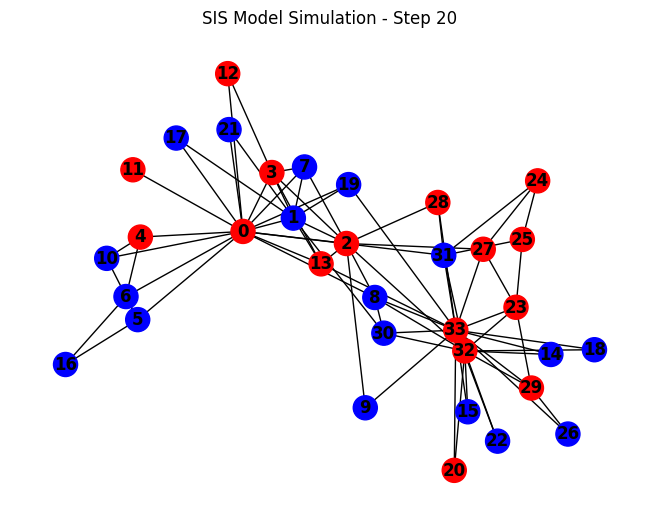

Step 21: Infected Nodes - 18
Step 22: Infected Nodes - 20
Step 23: Infected Nodes - 18
Step 24: Infected Nodes - 16
Step 25: Infected Nodes - 14


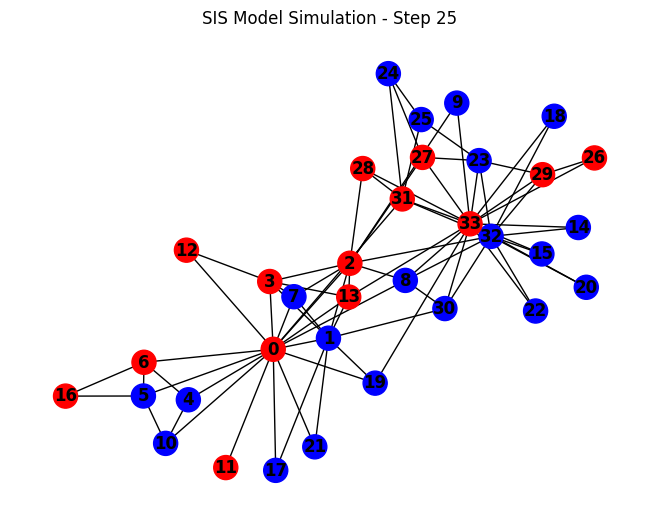

Step 26: Infected Nodes - 12
Step 27: Infected Nodes - 12
Step 28: Infected Nodes - 13
Step 29: Infected Nodes - 8
Step 30: Infected Nodes - 9


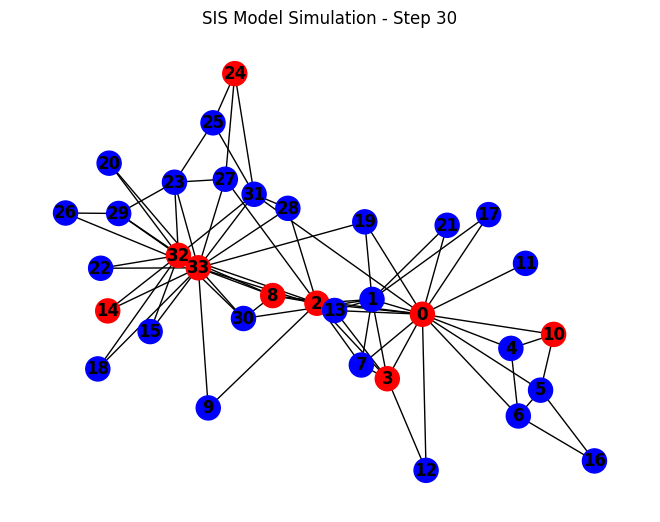

Step 31: Infected Nodes - 12
Step 32: Infected Nodes - 9
Step 33: Infected Nodes - 8
Step 34: Infected Nodes - 14
Step 35: Infected Nodes - 14


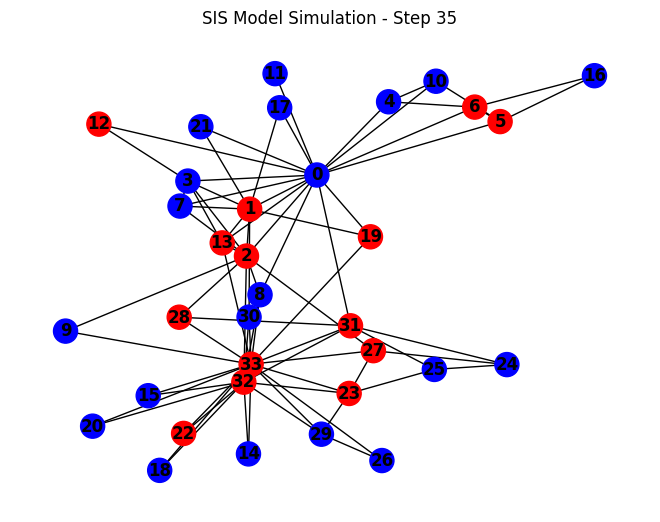

Step 36: Infected Nodes - 14
Step 37: Infected Nodes - 10
Step 38: Infected Nodes - 12
Step 39: Infected Nodes - 11
Step 40: Infected Nodes - 14


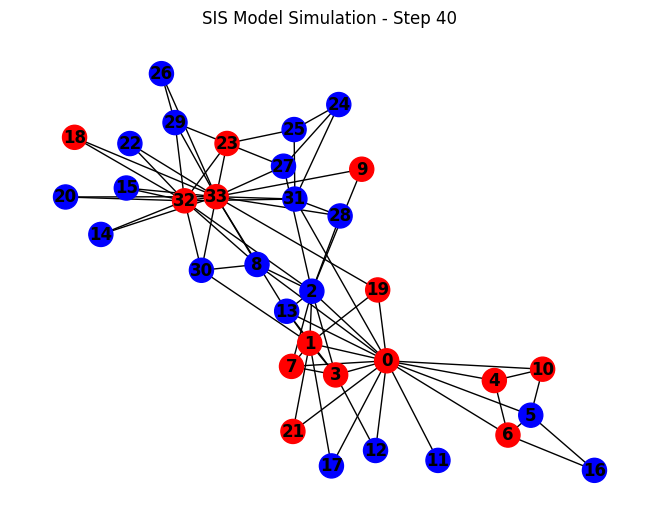

Step 41: Infected Nodes - 18
Step 42: Infected Nodes - 16
Step 43: Infected Nodes - 18
Step 44: Infected Nodes - 15
Step 45: Infected Nodes - 11


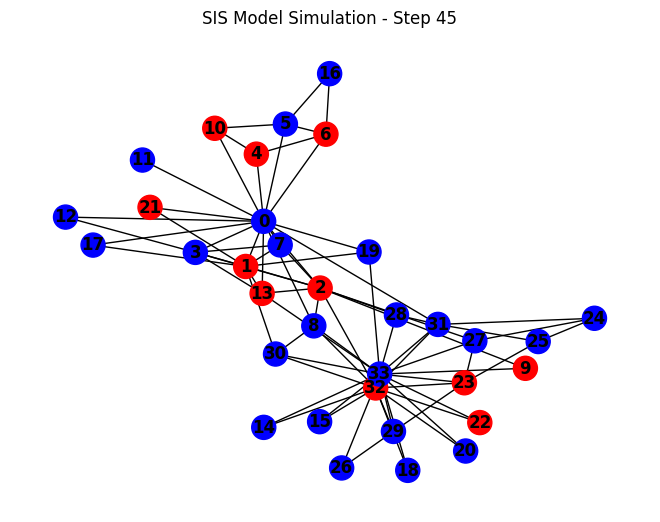

Step 46: Infected Nodes - 18
Step 47: Infected Nodes - 15
Step 48: Infected Nodes - 14
Step 49: Infected Nodes - 12
Step 50: Infected Nodes - 11


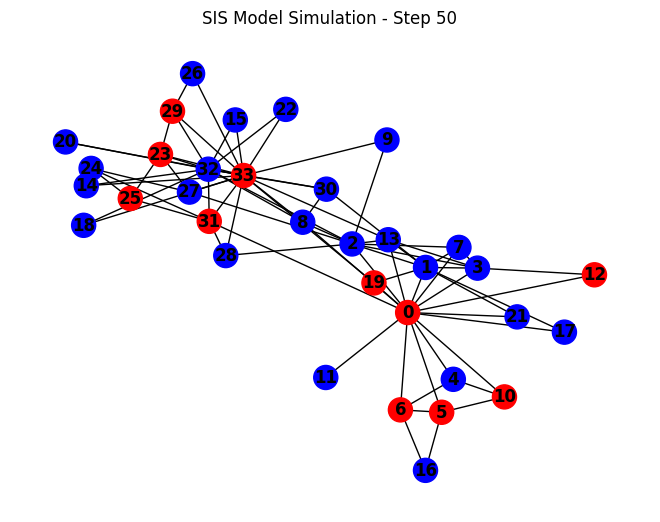

In [ ]:
def initialize_sis_model(graph, initial_infected_fraction):
    num_nodes = graph.number_of_nodes()
    num_infected = int(initial_infected_fraction * num_nodes)

    infected_nodes = random.sample(graph.nodes, num_infected)
    susceptible_nodes = set(graph.nodes) - set(infected_nodes)

    sis_model = {"graph": graph, "infected_nodes": set(infected_nodes), "susceptible_nodes": set(susceptible_nodes)}

    return sis_model

def plot_sis_graph(sis_model, title):
    graph = sis_model["graph"]
    pos = nx.spring_layout(graph)
    infected_nodes = sis_model["infected_nodes"]
    susceptible_nodes = sis_model["susceptible_nodes"]

    nx.draw(graph, pos, with_labels=True, font_weight='bold', node_color=['red' if node in infected_nodes else 'blue' for node in graph.nodes])
    plt.title(title)
    plt.show()

def run_sis_model(sis_model, num_steps, beta, gamma):
    graph = sis_model["graph"]
    infected_nodes = sis_model["infected_nodes"]
    susceptible_nodes = sis_model["susceptible_nodes"]

    for step in range(num_steps):
        new_infected_nodes = set()
        new_susceptible_nodes = set()

        for node in infected_nodes:
            if random.random() <= gamma:
                new_susceptible_nodes.add(node)
                susceptible_nodes.update(new_susceptible_nodes)
                continue

            neighbors = set(graph.neighbors(node))
            num_neighbors_to_infect = min(int(beta), len(neighbors))

            neighbors_to_infect = random.sample(neighbors, num_neighbors_to_infect)
            new_infected_nodes.update(neighbors_to_infect)

        infected_nodes.update(new_infected_nodes)
        infected_nodes -= new_susceptible_nodes


        print(f"Step {step + 1}: Infected Nodes - {len(infected_nodes)}")
        if step in [0, 4, 9, 14, 19, 24, 29, 34, 39, 44, 49]:
            plot_sis_graph(sis_model, f"SIS Model Simulation - Step {step + 1}")

    return sis_model

if __name__ == "__main__":
    # Create a graph (replace this with your specific graph creation logic)
    karate_club = nx.karate_club_graph()

    # Set the initial fraction of infected nodes
    initial_infected_fraction = 0.1

    # Initialize SIS model
    sis_model = initialize_sis_model(karate_club, initial_infected_fraction)

    # Plot the initial state of the graph
    plot_sis_graph(sis_model, "Initial State")

    # Run the SIS model for a certain number of steps
    num_steps = 50
    beta = 2.6
    gamma = 0.4
    sis_model = run_sis_model(sis_model, num_steps, beta, gamma)

The susceptible–infected–recovered–susceptible model or short SIRS-model.<br>  
δ to represent the average rate at which individuals lose immunity   
$\frac{ds}{dt}$ = δr - βsx    

$\frac{dx}{dt}$ = βsx − γx

$\frac{dr}{dt}$ = γx - δr  


s + x + r = 1  
s = 1 − x  

$\frac{dx}{dt}$ = βsx − γx $\longrightarrow$
$\frac{dx}{dt}$ = β(1 − x)x − γx $\longrightarrow$
$\frac{dx}{dt}$ = (β − βx)x − γx $\longrightarrow$
$\frac{dx}{dt}$ = (β − βx - γ)x $\longrightarrow$
$\frac{dx}{dt}$ = (β - γ - βx)x
  
integration constant C:  
x(t) = (1 − $\frac{γ}{β}$) $\frac{C e^{(β - γ)t}}{1 + Ce^{(β - γ)t}}$  
C = $\frac{βx_{0}}{β - γ - βx_{0}}$  
In the case of a large population and a small number of initial carriers of the
disease, x0 is small and C is well approximated as βx0/(β − γ)

x(t) =  $x_0$ $\frac{(β - γ)  e^{(β - γ)t}}{β - γ + βx_0e^{(β - γ)t}}$  

<ipython-input-2-85c8763e8c87>:5: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  infected_nodes = random.sample(graph.nodes, num_infected)


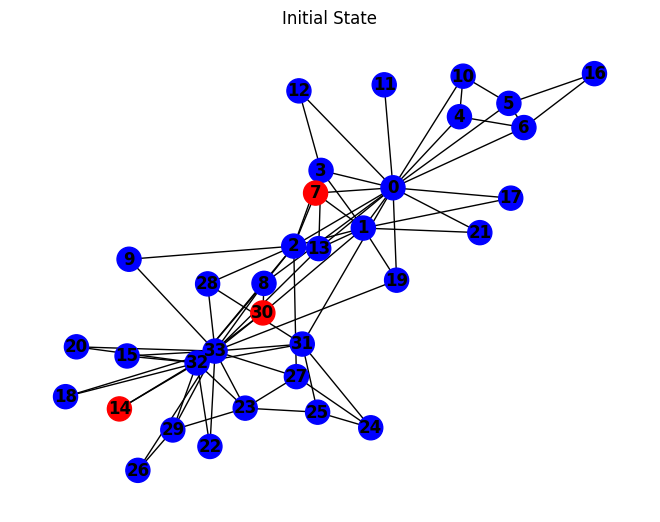

<ipython-input-2-85c8763e8c87>:43: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  neighbors_to_infect = random.sample(neighbors, num_neighbors_to_infect)


Step 1: Infected Nodes - 8


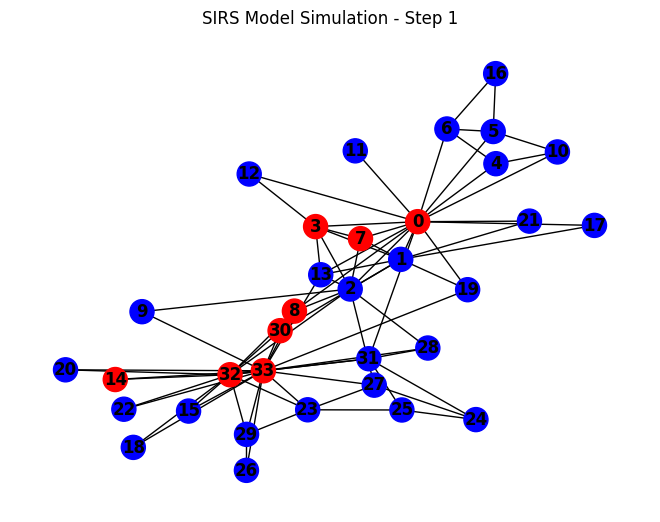

Step 2: Infected Nodes - 17


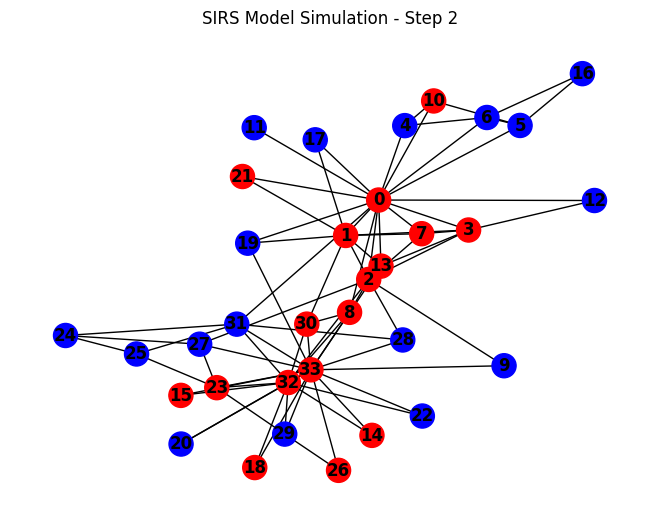

Step 3: Infected Nodes - 21


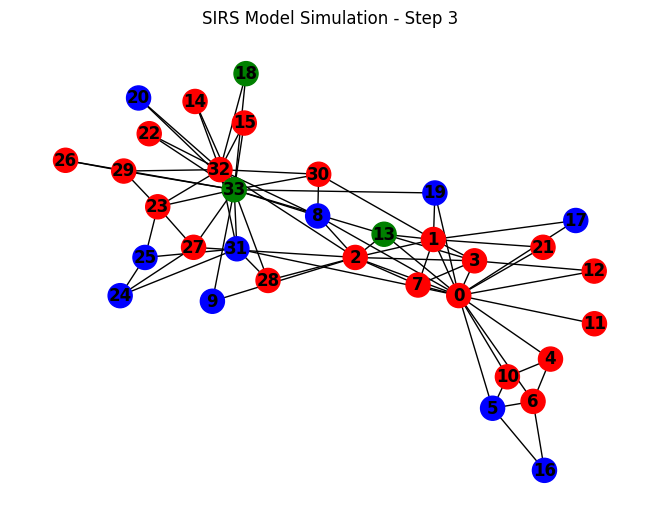

Step 4: Infected Nodes - 18


KeyboardInterrupt: 

In [2]:
def initialize_sirs_model(graph, initial_infected_fraction):
    num_nodes = graph.number_of_nodes()
    num_infected = int(initial_infected_fraction * num_nodes)

    infected_nodes = random.sample(graph.nodes, num_infected)
    susceptible_nodes = set(graph.nodes) - set(infected_nodes)
    recovered_nodes = set()

    sirs_model = {"graph": graph, "infected_nodes": set(infected_nodes), "susceptible_nodes": set(susceptible_nodes), "recovered_nodes": set(recovered_nodes)}

    return sirs_model

def plot_sirs_graph(sirs_model, title):
    graph = sirs_model["graph"]
    pos = nx.spring_layout(graph)
    infected_nodes = sirs_model["infected_nodes"]
    susceptible_nodes = sirs_model["susceptible_nodes"]
    recovered_nodes = sirs_model["recovered_nodes"]

    nx.draw(graph, pos, with_labels=True, font_weight='bold', node_color=['red' if node in infected_nodes else 'green' if node in recovered_nodes else 'blue' for node in graph.nodes])
    plt.title(title)
    plt.show()

def run_sirs_model(sirs_model, num_steps, beta, gamma, delta):
    graph = sirs_model["graph"]
    infected_nodes = sirs_model["infected_nodes"]
    susceptible_nodes = sirs_model["susceptible_nodes"]
    recovered_nodes = sirs_model["recovered_nodes"]

    for step in range(num_steps):
        new_infected_nodes = set()
        new_recovered_nodes = set()

        for node in infected_nodes:
            if random.random() <= gamma:
                new_recovered_nodes.add(node)
                recovered_nodes.update(new_recovered_nodes)
                continue

            neighbors = set(graph.neighbors(node)) - recovered_nodes
            num_neighbors_to_infect = min(int(beta), len(neighbors))

            neighbors_to_infect = random.sample(neighbors, num_neighbors_to_infect)
            new_infected_nodes.update(neighbors_to_infect)

        new_susceptible_nodes = set()
        for node in recovered_nodes:
            if random.random() <= delta:
                new_susceptible_nodes.add(node)
                susceptible_nodes.update(new_susceptible_nodes)

        recovered_nodes -= new_susceptible_nodes
        infected_nodes.update(new_infected_nodes)
        infected_nodes -= new_recovered_nodes

        print(f"Step {step + 1}: Infected Nodes - {len(infected_nodes)}")
        plot_sirs_graph(sirs_model, f"SIRS Model Simulation - Step {step + 1}")

    return sirs_model

if __name__ == "__main__":
    # Create a graph (replace this with your specific graph creation logic)
    karate_club = nx.karate_club_graph()

    # Set the initial fraction of infected nodes
    initial_infected_fraction = 0.1

    # Initialize SIRS model
    sirs_model = initialize_sirs_model(karate_club, initial_infected_fraction)

    # Plot the initial state of the graph
    plot_sirs_graph(sirs_model, "Initial State")

    # Run the SIRS model for a certain number of steps
    num_steps = 100
    beta = 2.6   # infection rate
    gamma = 0.2  # recover rate
    delta = 0.1  # lose immunity rate
    sirs_model = run_sirs_model(sirs_model, num_steps, beta, gamma, delta)

Since the simulation is working we now want to look at graphs that iterate over our given model 1000 times.

<ipython-input-16-d91b575d552d>:5: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  infected_nodes = random.sample(graph.nodes, num_infected)
<ipython-input-16-d91b575d552d>:36: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  neighbors_to_infect = random.sample(neighbors, num_neighbors_to_infect)


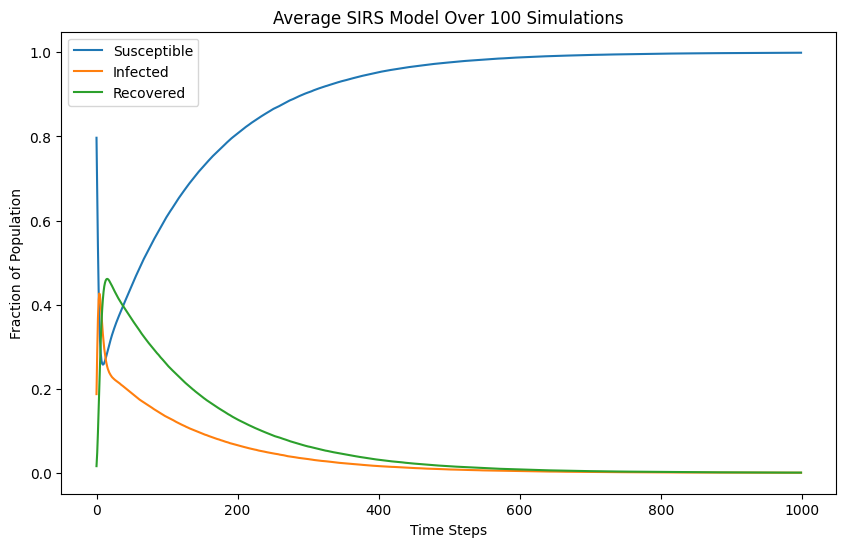

In [ ]:
def initialize_sirs_model(graph, initial_infected_fraction):
    num_nodes = graph.number_of_nodes()
    num_infected = int(initial_infected_fraction * num_nodes)

    infected_nodes = random.sample(graph.nodes, num_infected)
    susceptible_nodes = set(graph.nodes) - set(infected_nodes)
    recovered_nodes = set()

    sirs_model = {"graph": graph, "infected_nodes": set(infected_nodes), "susceptible_nodes": set(susceptible_nodes), "recovered_nodes": set(recovered_nodes)}

    return sirs_model

def run_sirs_model(sirs_model, num_steps, beta, gamma, delta):
    graph = sirs_model["graph"]
    infected_nodes = sirs_model["infected_nodes"]
    susceptible_nodes = sirs_model["susceptible_nodes"]
    recovered_nodes = sirs_model["recovered_nodes"]

    susceptible_fraction = []
    infected_fraction = []
    recovered_fraction = []

    for step in range(num_steps):
        new_infected_nodes = set()
        new_recovered_nodes = set()

        for node in infected_nodes:
            if random.random() <= gamma:
                new_recovered_nodes.add(node)
                recovered_nodes.update(new_recovered_nodes)
                continue

            neighbors = set(graph.neighbors(node)) - recovered_nodes
            num_neighbors_to_infect = min(int(beta), len(neighbors))

            neighbors_to_infect = random.sample(neighbors, num_neighbors_to_infect)
            new_infected_nodes.update(neighbors_to_infect)

        new_susceptible_nodes = set()
        for node in recovered_nodes:
            if random.random() <= delta:
                new_susceptible_nodes.add(node)
                susceptible_nodes.update(new_susceptible_nodes)

        recovered_nodes -= new_susceptible_nodes
        infected_nodes.update(new_infected_nodes)
        infected_nodes -= new_recovered_nodes

        total_nodes = graph.number_of_nodes()

        sus = graph.nodes
        sus -= infected_nodes
        sus -= recovered_nodes

        susceptible_fraction.append(len(sus) / total_nodes)
        infected_fraction.append(len(infected_nodes) / total_nodes)
        recovered_fraction.append(len(recovered_nodes) / total_nodes)

    return susceptible_fraction, infected_fraction, recovered_fraction

if __name__ == "__main__":
    # Create a graph (replace this with your specific graph creation logic)
    karate_club = nx.karate_club_graph()

    # Set the initial fraction of infected nodes
    initial_infected_fraction = 0.1

    # Set parameters
    num_simulations = 100000
    num_steps = 1000
    beta = 2.6
    gamma = 0.2
    delta = 0.1

    # Run multiple simulations
    avg_susceptible = np.zeros(num_steps)
    avg_infected = np.zeros(num_steps)
    avg_recovered = np.zeros(num_steps)

    for _ in range(num_simulations):
        # Initialize SIRS model
        sirs_model = initialize_sirs_model(karate_club, initial_infected_fraction)

        # Run SIRS model
        susceptible, infected, recovered = run_sirs_model(sirs_model, num_steps, beta, gamma, delta)

        # Accumulate results
        avg_susceptible += susceptible
        avg_infected += infected
        avg_recovered += recovered

    # Calculate average fractions
    avg_susceptible /= num_simulations
    avg_infected /= num_simulations
    avg_recovered /= num_simulations

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(range(num_steps), avg_susceptible, label='Susceptible')
    plt.plot(range(num_steps), avg_infected, label='Infected')
    plt.plot(range(num_steps), avg_recovered, label='Recovered')
    plt.xlabel('Time Steps')
    plt.ylabel('Fraction of Population')
    plt.title('Average SIRS Model Over 100 Simulations')
    plt.legend()
    plt.show()


20 min computation and the result looks weird

<ipython-input-17-3eff4b5a889f>:5: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  infected_nodes = random.sample(graph.nodes, num_infected)
<ipython-input-17-3eff4b5a889f>:36: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  neighbors_to_infect = random.sample(neighbors, num_neighbors_to_infect)


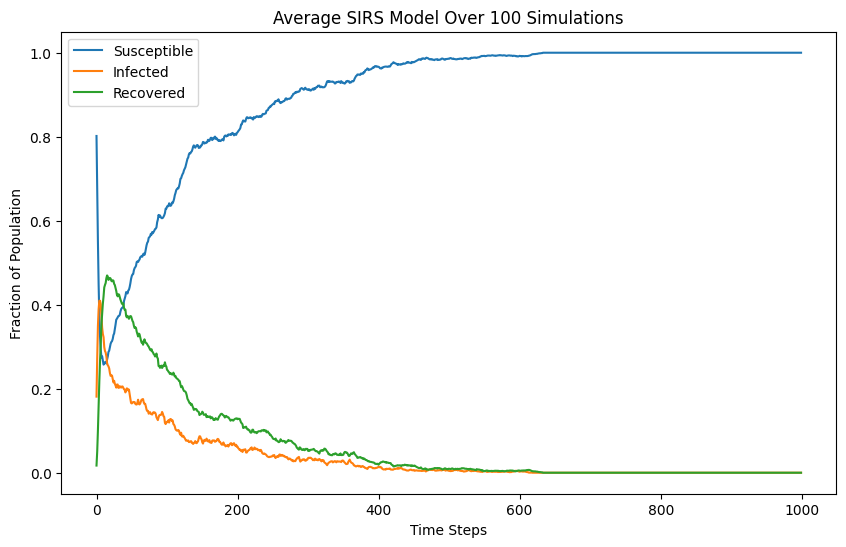

In [ ]:
def initialize_sirs_model(graph, initial_infected_fraction):
    num_nodes = graph.number_of_nodes()
    num_infected = int(initial_infected_fraction * num_nodes)

    infected_nodes = random.sample(graph.nodes, num_infected)
    susceptible_nodes = set(graph.nodes) - set(infected_nodes)
    recovered_nodes = set()

    sirs_model = {"graph": graph, "infected_nodes": set(infected_nodes), "susceptible_nodes": set(susceptible_nodes), "recovered_nodes": set(recovered_nodes)}

    return sirs_model

def run_sirs_model(sirs_model, num_steps, beta, gamma, delta):
    graph = sirs_model["graph"]
    infected_nodes = sirs_model["infected_nodes"]
    susceptible_nodes = sirs_model["susceptible_nodes"]
    recovered_nodes = sirs_model["recovered_nodes"]

    susceptible_fraction = []
    infected_fraction = []
    recovered_fraction = []

    for step in range(num_steps):
        new_infected_nodes = set()
        new_recovered_nodes = set()

        for node in infected_nodes:
            if random.random() <= gamma:
                new_recovered_nodes.add(node)
                recovered_nodes.update(new_recovered_nodes)
                continue

            neighbors = set(graph.neighbors(node)) - recovered_nodes
            num_neighbors_to_infect = min(int(beta), len(neighbors))

            neighbors_to_infect = random.sample(neighbors, num_neighbors_to_infect)
            new_infected_nodes.update(neighbors_to_infect)

        new_susceptible_nodes = set()
        for node in recovered_nodes:
            if random.random() <= delta:
                new_susceptible_nodes.add(node)
                susceptible_nodes.update(new_susceptible_nodes)

        recovered_nodes -= new_susceptible_nodes
        infected_nodes.update(new_infected_nodes)
        infected_nodes -= new_recovered_nodes

        total_nodes = graph.number_of_nodes()

        sus = graph.nodes
        sus -= infected_nodes
        sus -= recovered_nodes

        susceptible_fraction.append(len(sus) / total_nodes)
        infected_fraction.append(len(infected_nodes) / total_nodes)
        recovered_fraction.append(len(recovered_nodes) / total_nodes)

    return susceptible_fraction, infected_fraction, recovered_fraction

if __name__ == "__main__":
    # Create a graph (replace this with your specific graph creation logic)
    karate_club = nx.karate_club_graph()

    # Set the initial fraction of infected nodes
    initial_infected_fraction = 0.1

    # Set parameters
    num_simulations = 100
    num_steps = 1000
    beta = 2.6
    gamma = 0.2
    delta = 0.1

    # Run multiple simulations
    avg_susceptible = np.zeros(num_steps)
    avg_infected = np.zeros(num_steps)
    avg_recovered = np.zeros(num_steps)

    for _ in range(num_simulations):
        # Initialize SIRS model
        sirs_model = initialize_sirs_model(karate_club, initial_infected_fraction)

        # Run SIRS model
        susceptible, infected, recovered = run_sirs_model(sirs_model, num_steps, beta, gamma, delta)

        # Accumulate results
        avg_susceptible += susceptible
        avg_infected += infected
        avg_recovered += recovered

    # Calculate average fractions
    avg_susceptible /= num_simulations
    avg_infected /= num_simulations
    avg_recovered /= num_simulations

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(range(num_steps), avg_susceptible, label='Susceptible')
    plt.plot(range(num_steps), avg_infected, label='Infected')
    plt.plot(range(num_steps), avg_recovered, label='Recovered')
    plt.xlabel('Time Steps')
    plt.ylabel('Fraction of Population')
    plt.title('Average SIRS Model Over 100 Simulations')
    plt.legend()
    plt.show()

<ipython-input-18-6235c57d2c01>:5: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  infected_nodes = random.sample(graph.nodes, num_infected)
<ipython-input-18-6235c57d2c01>:36: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  neighbors_to_infect = random.sample(neighbors, num_neighbors_to_infect)


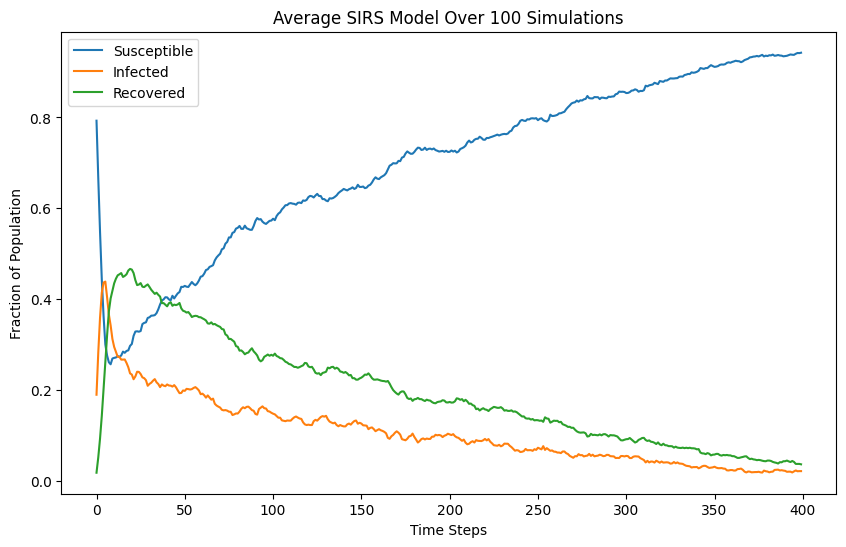

In [ ]:
def initialize_sirs_model(graph, initial_infected_fraction):
    num_nodes = graph.number_of_nodes()
    num_infected = int(initial_infected_fraction * num_nodes)

    infected_nodes = random.sample(graph.nodes, num_infected)
    susceptible_nodes = set(graph.nodes) - set(infected_nodes)
    recovered_nodes = set()

    sirs_model = {"graph": graph, "infected_nodes": set(infected_nodes), "susceptible_nodes": set(susceptible_nodes), "recovered_nodes": set(recovered_nodes)}

    return sirs_model

def run_sirs_model(sirs_model, num_steps, beta, gamma, delta):
    graph = sirs_model["graph"]
    infected_nodes = sirs_model["infected_nodes"]
    susceptible_nodes = sirs_model["susceptible_nodes"]
    recovered_nodes = sirs_model["recovered_nodes"]

    susceptible_fraction = []
    infected_fraction = []
    recovered_fraction = []

    for step in range(num_steps):
        new_infected_nodes = set()
        new_recovered_nodes = set()

        for node in infected_nodes:
            if random.random() <= gamma:
                new_recovered_nodes.add(node)
                recovered_nodes.update(new_recovered_nodes)
                continue

            neighbors = set(graph.neighbors(node)) - recovered_nodes
            num_neighbors_to_infect = min(int(beta), len(neighbors))

            neighbors_to_infect = random.sample(neighbors, num_neighbors_to_infect)
            new_infected_nodes.update(neighbors_to_infect)

        new_susceptible_nodes = set()
        for node in recovered_nodes:
            if random.random() <= delta:
                new_susceptible_nodes.add(node)
                susceptible_nodes.update(new_susceptible_nodes)

        recovered_nodes -= new_susceptible_nodes
        infected_nodes.update(new_infected_nodes)
        infected_nodes -= new_recovered_nodes

        total_nodes = graph.number_of_nodes()

        sus = graph.nodes
        sus -= infected_nodes
        sus -= recovered_nodes

        susceptible_fraction.append(len(sus) / total_nodes)
        infected_fraction.append(len(infected_nodes) / total_nodes)
        recovered_fraction.append(len(recovered_nodes) / total_nodes)

    return susceptible_fraction, infected_fraction, recovered_fraction

if __name__ == "__main__":
    # Create a graph (replace this with your specific graph creation logic)
    karate_club = nx.karate_club_graph()

    # Set the initial fraction of infected nodes
    initial_infected_fraction = 0.1

    # Set parameters
    num_simulations = 100
    num_steps = 400
    beta = 2.6
    gamma = 0.2
    delta = 0.1

    # Run multiple simulations
    avg_susceptible = np.zeros(num_steps)
    avg_infected = np.zeros(num_steps)
    avg_recovered = np.zeros(num_steps)

    for _ in range(num_simulations):
        # Initialize SIRS model
        sirs_model = initialize_sirs_model(karate_club, initial_infected_fraction)

        # Run SIRS model
        susceptible, infected, recovered = run_sirs_model(sirs_model, num_steps, beta, gamma, delta)

        # Accumulate results
        avg_susceptible += susceptible
        avg_infected += infected
        avg_recovered += recovered

    # Calculate average fractions
    avg_susceptible /= num_simulations
    avg_infected /= num_simulations
    avg_recovered /= num_simulations

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(range(num_steps), avg_susceptible, label='Susceptible')
    plt.plot(range(num_steps), avg_infected, label='Infected')
    plt.plot(range(num_steps), avg_recovered, label='Recovered')
    plt.xlabel('Time Steps')
    plt.ylabel('Fraction of Population')
    plt.title('Average SIRS Model Over 100 Simulations')
    plt.legend()
    plt.show()

<ipython-input-19-20c3d18732bf>:5: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  infected_nodes = random.sample(graph.nodes, num_infected)
<ipython-input-19-20c3d18732bf>:36: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  neighbors_to_infect = random.sample(neighbors, num_neighbors_to_infect)


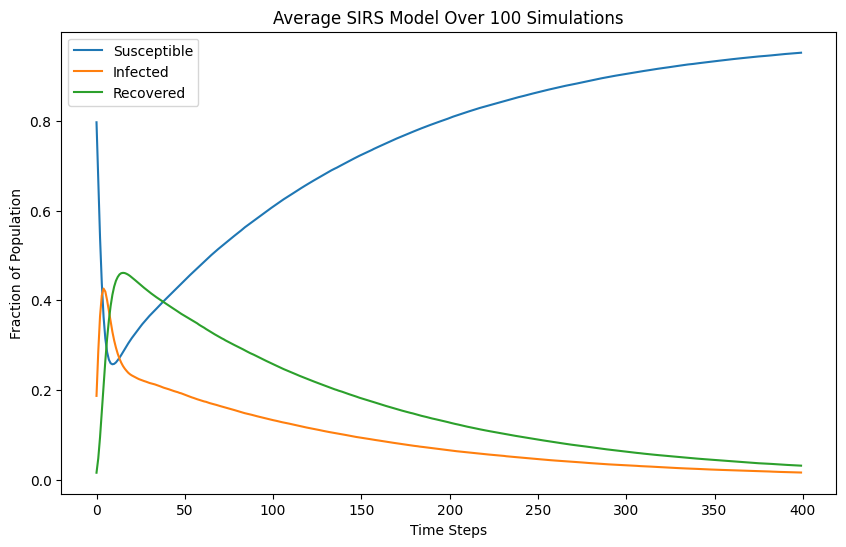

In [ ]:
def initialize_sirs_model(graph, initial_infected_fraction):
    num_nodes = graph.number_of_nodes()
    num_infected = int(initial_infected_fraction * num_nodes)

    infected_nodes = random.sample(graph.nodes, num_infected)
    susceptible_nodes = set(graph.nodes) - set(infected_nodes)
    recovered_nodes = set()

    sirs_model = {"graph": graph, "infected_nodes": set(infected_nodes), "susceptible_nodes": set(susceptible_nodes), "recovered_nodes": set(recovered_nodes)}

    return sirs_model

def run_sirs_model(sirs_model, num_steps, beta, gamma, delta):
    graph = sirs_model["graph"]
    infected_nodes = sirs_model["infected_nodes"]
    susceptible_nodes = sirs_model["susceptible_nodes"]
    recovered_nodes = sirs_model["recovered_nodes"]

    susceptible_fraction = []
    infected_fraction = []
    recovered_fraction = []

    for step in range(num_steps):
        new_infected_nodes = set()
        new_recovered_nodes = set()

        for node in infected_nodes:
            if random.random() <= gamma:
                new_recovered_nodes.add(node)
                recovered_nodes.update(new_recovered_nodes)
                continue

            neighbors = set(graph.neighbors(node)) - recovered_nodes
            num_neighbors_to_infect = min(int(beta), len(neighbors))

            neighbors_to_infect = random.sample(neighbors, num_neighbors_to_infect)
            new_infected_nodes.update(neighbors_to_infect)

        new_susceptible_nodes = set()
        for node in recovered_nodes:
            if random.random() <= delta:
                new_susceptible_nodes.add(node)
                susceptible_nodes.update(new_susceptible_nodes)

        recovered_nodes -= new_susceptible_nodes
        infected_nodes.update(new_infected_nodes)
        infected_nodes -= new_recovered_nodes

        total_nodes = graph.number_of_nodes()

        sus = graph.nodes
        sus -= infected_nodes
        sus -= recovered_nodes

        susceptible_fraction.append(len(sus) / total_nodes)
        infected_fraction.append(len(infected_nodes) / total_nodes)
        recovered_fraction.append(len(recovered_nodes) / total_nodes)

    return susceptible_fraction, infected_fraction, recovered_fraction

if __name__ == "__main__":
    # Create a graph (replace this with your specific graph creation logic)
    karate_club = nx.karate_club_graph()

    # Set the initial fraction of infected nodes
    initial_infected_fraction = 0.1

    # Set parameters
    num_simulations = 100000
    num_steps = 400
    beta = 2.6
    gamma = 0.2
    delta = 0.1

    # Run multiple simulations
    avg_susceptible = np.zeros(num_steps)
    avg_infected = np.zeros(num_steps)
    avg_recovered = np.zeros(num_steps)

    for _ in range(num_simulations):
        # Initialize SIRS model
        sirs_model = initialize_sirs_model(karate_club, initial_infected_fraction)

        # Run SIRS model
        susceptible, infected, recovered = run_sirs_model(sirs_model, num_steps, beta, gamma, delta)

        # Accumulate results
        avg_susceptible += susceptible
        avg_infected += infected
        avg_recovered += recovered

    # Calculate average fractions
    avg_susceptible /= num_simulations
    avg_infected /= num_simulations
    avg_recovered /= num_simulations

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(range(num_steps), avg_susceptible, label='Susceptible')
    plt.plot(range(num_steps), avg_infected, label='Infected')
    plt.plot(range(num_steps), avg_recovered, label='Recovered')
    plt.xlabel('Time Steps')
    plt.ylabel('Fraction of Population')
    plt.title('Average SIRS Model Over 100 Simulations')
    plt.legend()
    plt.show()

<ipython-input-20-eaac08f0daa9>:5: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  infected_nodes = random.sample(graph.nodes, num_infected)
<ipython-input-20-eaac08f0daa9>:36: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  neighbors_to_infect = random.sample(neighbors, num_neighbors_to_infect)


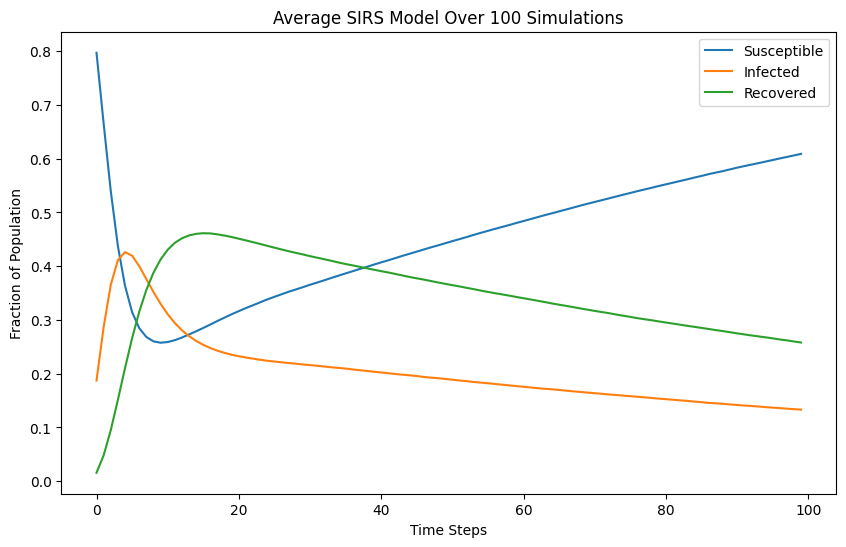

In [ ]:
def initialize_sirs_model(graph, initial_infected_fraction):
    num_nodes = graph.number_of_nodes()
    num_infected = int(initial_infected_fraction * num_nodes)

    infected_nodes = random.sample(graph.nodes, num_infected)
    susceptible_nodes = set(graph.nodes) - set(infected_nodes)
    recovered_nodes = set()

    sirs_model = {"graph": graph, "infected_nodes": set(infected_nodes), "susceptible_nodes": set(susceptible_nodes), "recovered_nodes": set(recovered_nodes)}

    return sirs_model

def run_sirs_model(sirs_model, num_steps, beta, gamma, delta):
    graph = sirs_model["graph"]
    infected_nodes = sirs_model["infected_nodes"]
    susceptible_nodes = sirs_model["susceptible_nodes"]
    recovered_nodes = sirs_model["recovered_nodes"]

    susceptible_fraction = []
    infected_fraction = []
    recovered_fraction = []

    for step in range(num_steps):
        new_infected_nodes = set()
        new_recovered_nodes = set()

        for node in infected_nodes:
            if random.random() <= gamma:
                new_recovered_nodes.add(node)
                recovered_nodes.update(new_recovered_nodes)
                continue

            neighbors = set(graph.neighbors(node)) - recovered_nodes
            num_neighbors_to_infect = min(int(beta), len(neighbors))

            neighbors_to_infect = random.sample(neighbors, num_neighbors_to_infect)
            new_infected_nodes.update(neighbors_to_infect)

        new_susceptible_nodes = set()
        for node in recovered_nodes:
            if random.random() <= delta:
                new_susceptible_nodes.add(node)
                susceptible_nodes.update(new_susceptible_nodes)

        recovered_nodes -= new_susceptible_nodes
        infected_nodes.update(new_infected_nodes)
        infected_nodes -= new_recovered_nodes

        total_nodes = graph.number_of_nodes()

        sus = graph.nodes
        sus -= infected_nodes
        sus -= recovered_nodes

        susceptible_fraction.append(len(sus) / total_nodes)
        infected_fraction.append(len(infected_nodes) / total_nodes)
        recovered_fraction.append(len(recovered_nodes) / total_nodes)

    return susceptible_fraction, infected_fraction, recovered_fraction

if __name__ == "__main__":
    # Create a graph (replace this with your specific graph creation logic)
    karate_club = nx.karate_club_graph()

    # Set the initial fraction of infected nodes
    initial_infected_fraction = 0.1

    # Set parameters
    num_simulations = 100000
    num_steps = 100
    beta = 2.6
    gamma = 0.2
    delta = 0.1

    # Run multiple simulations
    avg_susceptible = np.zeros(num_steps)
    avg_infected = np.zeros(num_steps)
    avg_recovered = np.zeros(num_steps)

    for _ in range(num_simulations):
        # Initialize SIRS model
        sirs_model = initialize_sirs_model(karate_club, initial_infected_fraction)

        # Run SIRS model
        susceptible, infected, recovered = run_sirs_model(sirs_model, num_steps, beta, gamma, delta)

        # Accumulate results
        avg_susceptible += susceptible
        avg_infected += infected
        avg_recovered += recovered

    # Calculate average fractions
    avg_susceptible /= num_simulations
    avg_infected /= num_simulations
    avg_recovered /= num_simulations

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(range(num_steps), avg_susceptible, label='Susceptible')
    plt.plot(range(num_steps), avg_infected, label='Infected')
    plt.plot(range(num_steps), avg_recovered, label='Recovered')
    plt.xlabel('Time Steps')
    plt.ylabel('Fraction of Population')
    plt.title('Average SIRS Model Over 100 Simulations')
    plt.legend()
    plt.show()

_______________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

SISR - with outbreaks and stacking of diseases on a node <br>
immunity rate δ: rate at which individuals in the infected state can directly transition to the recovered state

γ: recovery rate to susceptible

β: contact rate

$\frac{ds}{dt}$ = γx - βsx - δx    

$\frac{dx}{dt}$ = βsx − (γ+δ)x

$\frac{dr}{dt}$ = δx


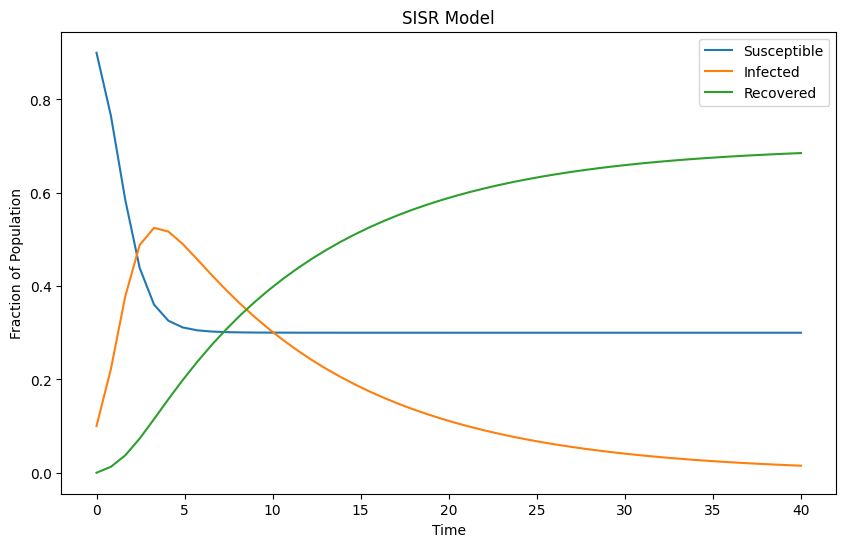

In [ ]:
# Define the SISR model equations
def sisr_model(y, t, beta, gamma, delta):
    s, x, r = y
    dsdt = gamma * x - beta * s * x
    dxdt = beta * s * x - (gamma + delta) * x
    drdt = delta * x
    return [dsdt, dxdt, drdt]

# Set the initial conditions and parameters
s0 = 0.90
x0 = 0.10
r0 = 0.0
beta = 2.0
gamma = 0.6
delta = 0.1

# Set the time points
t = np.linspace(0, 40)

# Solve the SISR equations using odeint
solution = odeint(sisr_model, [s0, x0, r0], t, args=(beta, gamma, delta))

# Extract the results for each state
susceptible, infected, recovered = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, susceptible, label='Susceptible')
plt.plot(t, infected, label='Infected')
plt.plot(t, recovered, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Fraction of Population')
plt.title('SISR Model')
plt.legend()
plt.show()


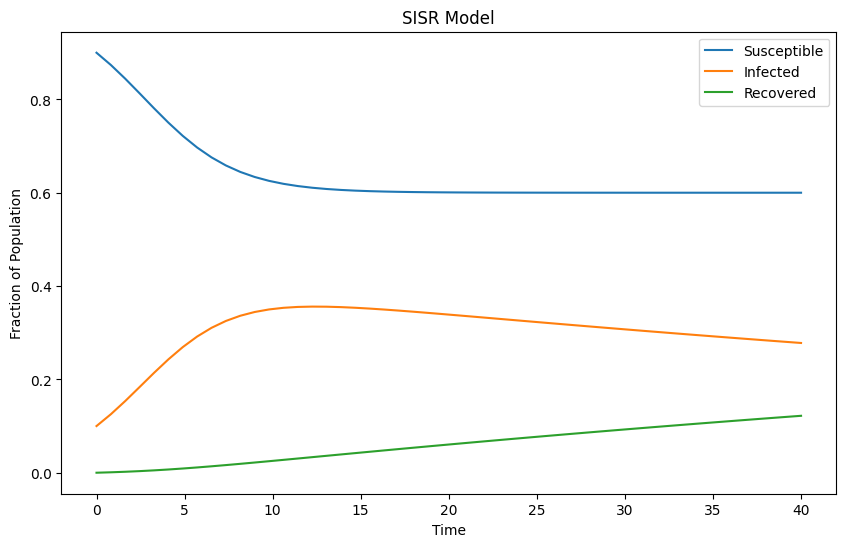

In [ ]:
# Define the SISR model equations
def sisr_model(y, t, beta, gamma, delta):
    s, x, r = y
    dsdt = gamma * x - beta * s * x
    dxdt = beta * s * x - (gamma + delta) * x
    drdt = delta * x
    return [dsdt, dxdt, drdt]

# Set the initial conditions and parameters
s0 = 0.90
x0 = 0.10
r0 = 0.0
beta = 1.0
gamma = 0.6
delta = 0.01

# Set the time points
t = np.linspace(0, 40)

# Solve the SISR equations using odeint
solution = odeint(sisr_model, [s0, x0, r0], t, args=(beta, gamma, delta))

# Extract the results for each state
susceptible, infected, recovered = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, susceptible, label='Susceptible')
plt.plot(t, infected, label='Infected')
plt.plot(t, recovered, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Fraction of Population')
plt.title('SISR Model')
plt.legend()
plt.show()


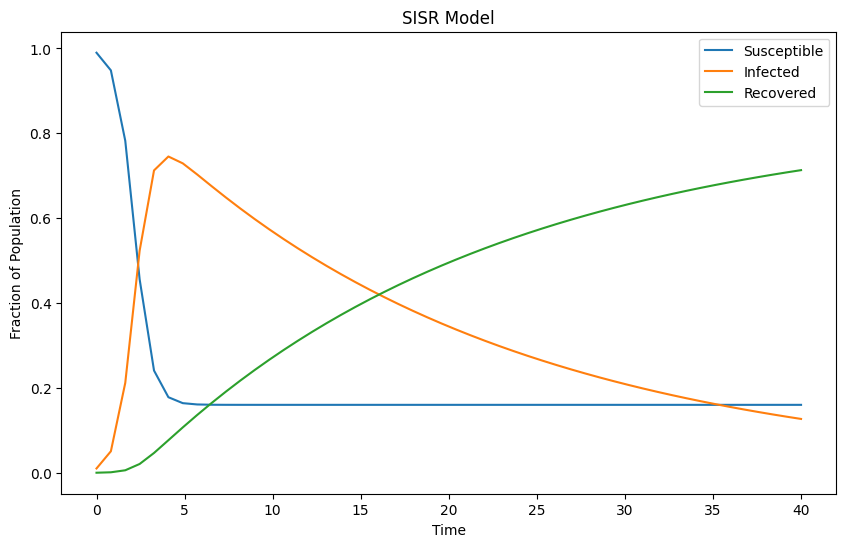

In [ ]:
# Define the SISR model equations
def sisr_model(y, t, beta, gamma, delta):
    s, x, r = y
    dsdt = gamma * x - beta * s * x
    dxdt = beta * s * x - (gamma + delta) * x
    drdt = delta * x
    return [dsdt, dxdt, drdt]

# Set the initial conditions and parameters
s0 = 0.99
x0 = 0.01
r0 = 0.0
beta = 2.5
gamma = 0.4
delta = 0.05

# Set the time points
t = np.linspace(0, 40)

# Solve the SISR equations using odeint
solution = odeint(sisr_model, [s0, x0, r0], t, args=(beta, gamma, delta))

# Extract the results for each state
susceptible, infected, recovered = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, susceptible, label='Susceptible')
plt.plot(t, infected, label='Infected')
plt.plot(t, recovered, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Fraction of Population')
plt.title('SISR Model')
plt.legend()
plt.show()


In [ ]:
def initialize_sisr_model(graph, initial_infected_fraction):
    num_nodes = graph.number_of_nodes()
    num_infected = int(initial_infected_fraction * num_nodes)

    infected_nodes = random.sample(graph.nodes, num_infected)
    susceptible_nodes = set(graph.nodes) - set(infected_nodes)
    recovered_nodes = set()

    sisr_model = {"graph": graph, "infected_nodes": set(infected_nodes), "susceptible_nodes": set(susceptible_nodes), "recovered_nodes": set(recovered_nodes)}

    return sisr_model

def plot_sisr_graph(sisr_model, title):
    graph = sisr_model["graph"]
    pos = nx.spring_layout(graph)
    infected_nodes = sisr_model["infected_nodes"]
    susceptible_nodes = sisr_model["susceptible_nodes"]
    recovered_nodes = sisr_model["recovered_nodes"]

    nx.draw(graph, pos, with_labels=True, font_weight='bold', node_color=['red' if node in infected_nodes else 'green' if node in recovered_nodes else 'blue' for node in graph.nodes])
    plt.title(title)
    plt.show()

def run_sisr_model(sisr_model, num_steps, beta, gamma, delta):
    graph = sisr_model["graph"]
    infected_nodes = sisr_model["infected_nodes"]
    susceptible_nodes = sisr_model["susceptible_nodes"]
    recovered_nodes = sisr_model["recovered_nodes"]

    for step in range(num_steps):
        new_infected_nodes = set()
        new_recovered_nodes = set()
        new_susceptible_nodes = set()

        for node in infected_nodes:
            if random.random() <= gamma + delta:
                if random.random() <= delta / (gamma + delta):
                    print(gamma)
                    print(delta)
                    new_recovered_nodes.add(node)
                    recovered_nodes.update(new_recovered_nodes)
                else:
                    new_susceptible_nodes.add(node)
                    susceptible_nodes.update(new_susceptible_nodes)
                continue

            neighbors = set(graph.neighbors(node)) - recovered_nodes
            num_neighbors_to_infect = min(int(beta), len(neighbors))

            neighbors_to_infect = random.sample(neighbors, num_neighbors_to_infect)
            new_infected_nodes.update(neighbors_to_infect)

        infected_nodes.update(new_infected_nodes)
        infected_nodes -= recovered_nodes
        infected_nodes -= new_susceptible_nodes

        susceptible_nodes -= infected_nodes

        #if step in range(0, 50, 5):
        print(f"Step {step + 1}: Infected Nodes - {len(infected_nodes)}")
        plot_sisr_graph(sisr_model, f"SISR Model Simulation - Step {step + 1}")

    return sisr_model

if __name__ == "__main__":
    # Create a graph (replace this with your specific graph creation logic)
    karate_club = nx.karate_club_graph()

    # Set the initial fraction of infected nodes
    initial_infected_fraction = 0.1

    # Initialize SISR model
    sisr_model = initialize_sisr_model(karate_club, initial_infected_fraction)

    # Plot the initial state of the graph
    plot_sisr_graph(sisr_model, "Initial State")

    # Run the SISR model for a certain number of steps
    num_steps = 50
    beta = 2.6   # infection rate
    gamma = 0.2  # recover rate
    delta = 0.05  # immunity rate
    sisr_model = run_sisr_model(sisr_model, num_steps, beta, gamma, delta)

Output hidden; open in https://colab.research.google.com to view.

<ipython-input-30-252c694f4e51>:7: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  infected_nodes = random.sample(graph.nodes, num_infected)


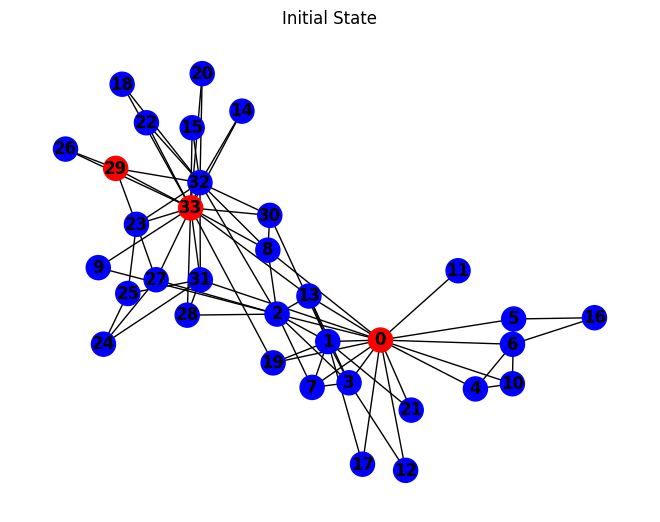

<ipython-input-30-252c694f4e51>:52: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  neighbors_to_infect = random.sample(neighbors, num_neighbors_to_infect)


Step 1: Infected Nodes - 5
Step 2: Infected Nodes - 12
Step 3: Infected Nodes - 12
Step 4: Infected Nodes - 16
Step 5: Infected Nodes - 17
Step 6: Infected Nodes - 19


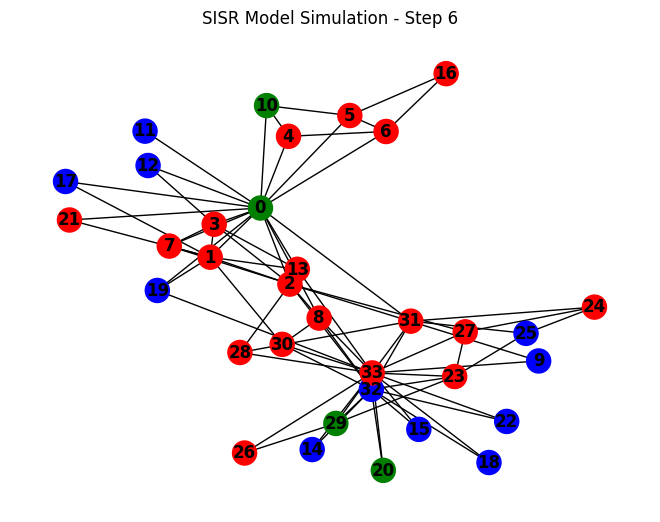

Step 7: Infected Nodes - 15
Step 8: Infected Nodes - 15
Step 9: Infected Nodes - 20
Step 10: Infected Nodes - 13
Step 11: Infected Nodes - 19


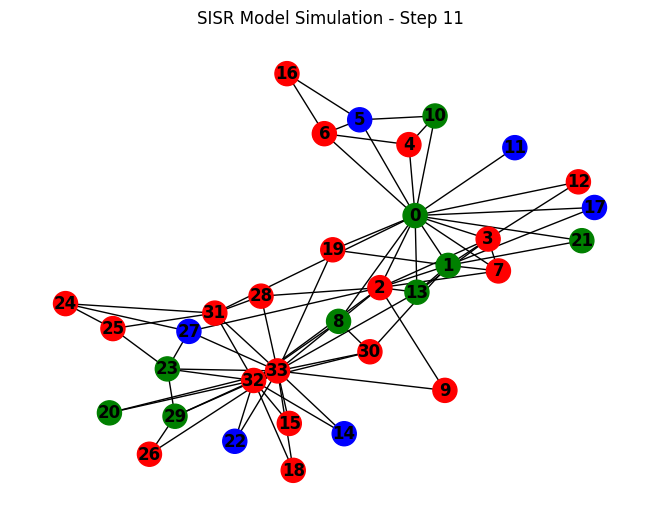

Step 12: Infected Nodes - 15
Step 13: Infected Nodes - 11
Step 14: Infected Nodes - 12
Step 15: Infected Nodes - 11
Step 16: Infected Nodes - 13


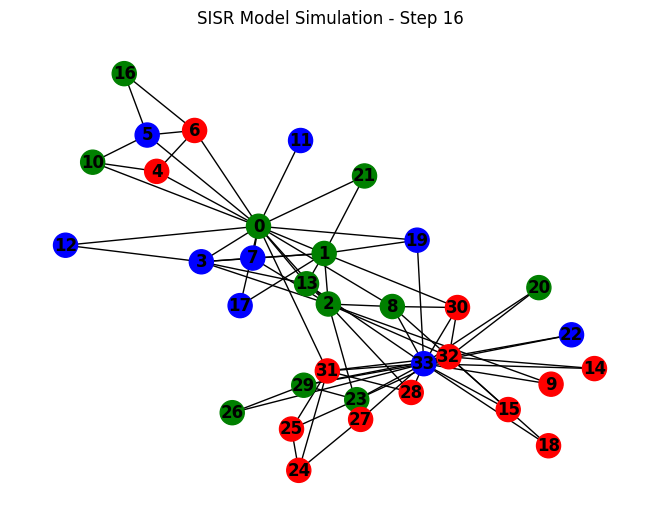

Step 17: Infected Nodes - 16
Step 18: Infected Nodes - 10
Step 19: Infected Nodes - 8
Step 20: Infected Nodes - 7
Step 21: Infected Nodes - 7


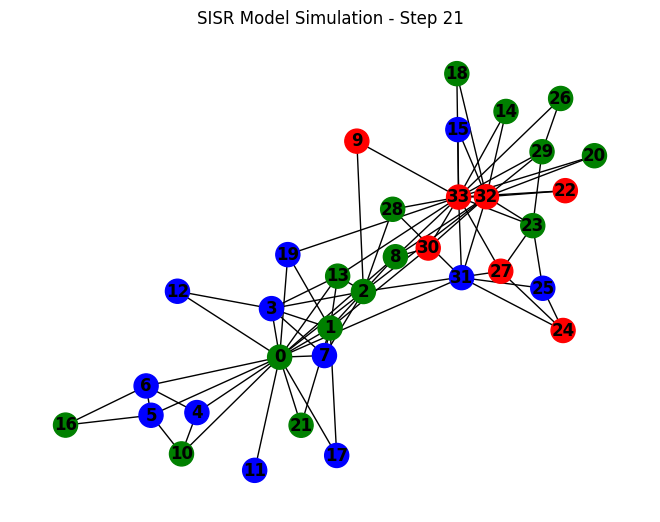

Step 22: Infected Nodes - 8
Step 23: Infected Nodes - 7
Step 24: Infected Nodes - 6
Step 25: Infected Nodes - 7
Step 26: Infected Nodes - 7


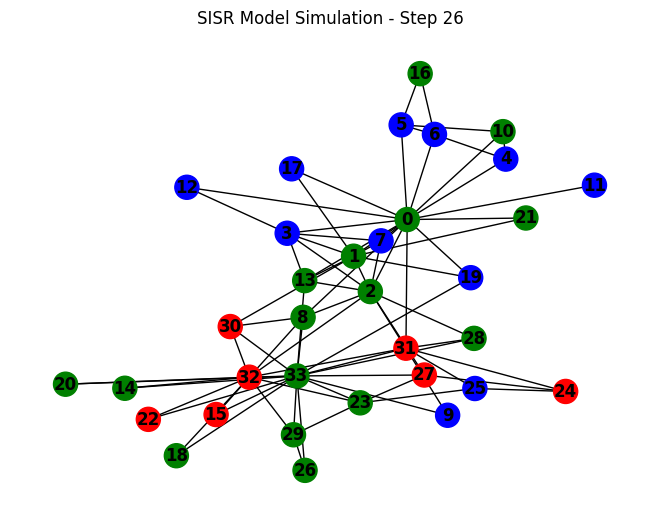

Step 27: Infected Nodes - 8
Step 28: Infected Nodes - 7
Step 29: Infected Nodes - 6
Step 30: Infected Nodes - 7
Step 31: Infected Nodes - 6


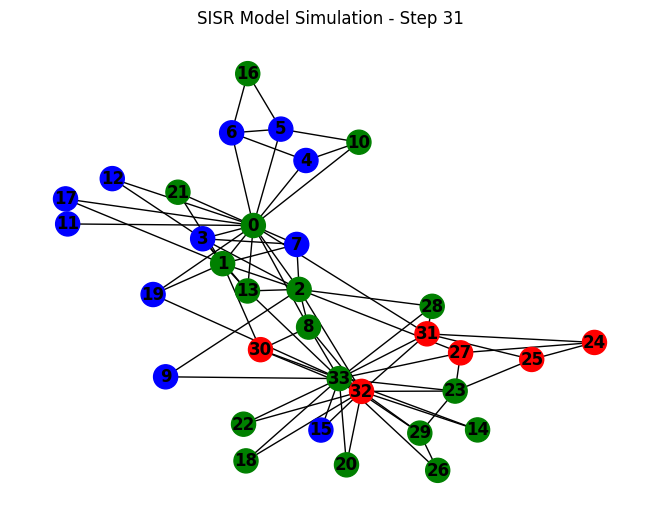

Step 32: Infected Nodes - 3
Step 33: Infected Nodes - 7
Step 34: Infected Nodes - 5
Step 35: Infected Nodes - 4
Step 36: Infected Nodes - 7


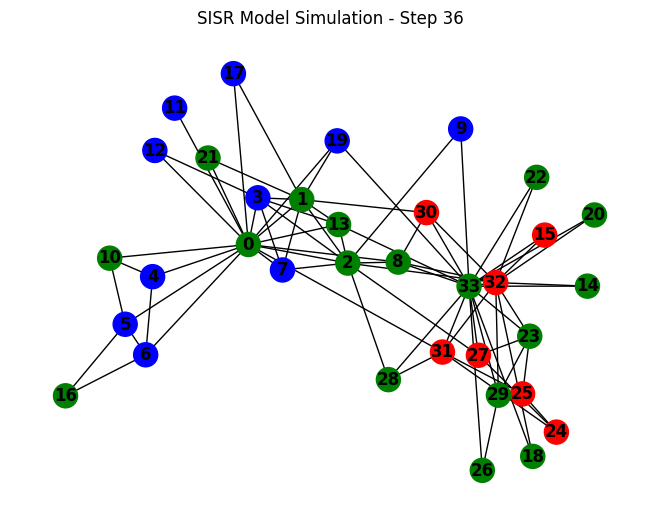

Step 37: Infected Nodes - 5
Step 38: Infected Nodes - 4
Step 39: Infected Nodes - 7
Step 40: Infected Nodes - 6
Step 41: Infected Nodes - 5


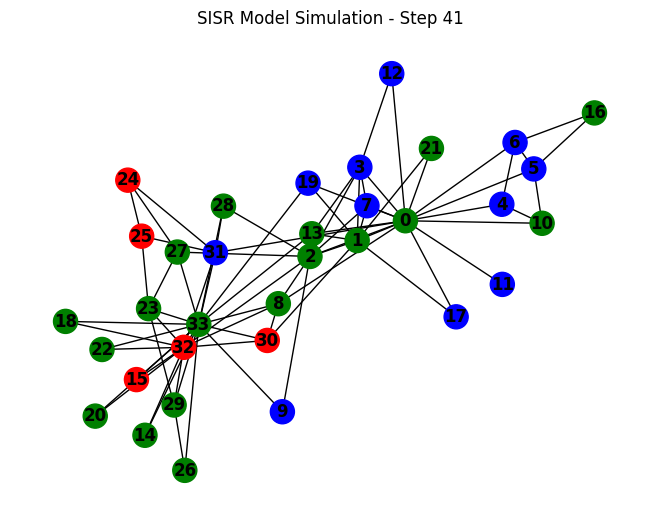

Step 42: Infected Nodes - 3
Step 43: Infected Nodes - 3
Step 44: Infected Nodes - 3
Step 45: Infected Nodes - 3
Step 46: Infected Nodes - 3


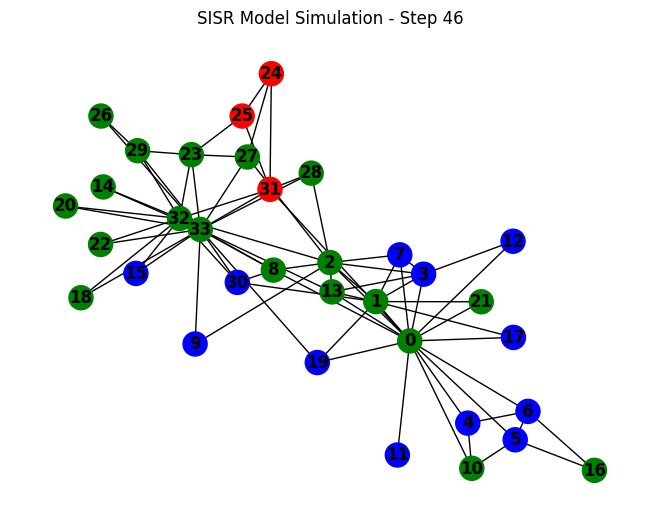

Step 47: Infected Nodes - 3
Step 48: Infected Nodes - 2
Step 49: Infected Nodes - 2
Step 50: Infected Nodes - 1


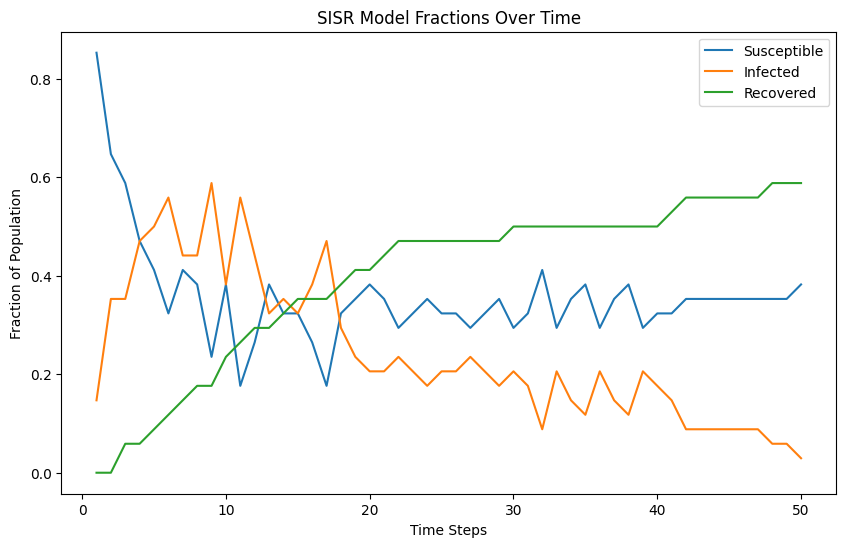

In [ ]:
# With fraction graph

def initialize_sisr_model(graph, initial_infected_fraction):
    num_nodes = graph.number_of_nodes()
    num_infected = int(initial_infected_fraction * num_nodes)

    infected_nodes = random.sample(graph.nodes, num_infected)
    susceptible_nodes = set(graph.nodes) - set(infected_nodes)
    recovered_nodes = set()

    sisr_model = {"graph": graph, "infected_nodes": set(infected_nodes), "susceptible_nodes": set(susceptible_nodes), "recovered_nodes": set(recovered_nodes)}

    return sisr_model

def plot_sisr_graph(sisr_model, title):
    graph = sisr_model["graph"]
    pos = nx.spring_layout(graph)
    infected_nodes = sisr_model["infected_nodes"]
    susceptible_nodes = sisr_model["susceptible_nodes"]
    recovered_nodes = sisr_model["recovered_nodes"]

    nx.draw(graph, pos, with_labels=True, font_weight='bold', node_color=['red' if node in infected_nodes else 'green' if node in recovered_nodes else 'blue' for node in graph.nodes])
    plt.title(title)
    plt.show()

def run_sisr_model(sisr_model, num_steps, beta, gamma, delta):
    graph = sisr_model["graph"]
    infected_nodes = sisr_model["infected_nodes"]
    susceptible_nodes = sisr_model["susceptible_nodes"]
    recovered_nodes = sisr_model["recovered_nodes"]

    fractions = []

    for step in range(num_steps):
        new_infected_nodes = set()
        new_recovered_nodes = set()
        new_susceptible_nodes = set()

        for node in infected_nodes:
            if random.random() <= gamma + delta:
                if random.random() <= delta / (gamma + delta):
                    new_recovered_nodes.add(node)
                    recovered_nodes.update(new_recovered_nodes)
                else:
                    new_susceptible_nodes.add(node)
                    susceptible_nodes.update(new_susceptible_nodes)
                continue

            neighbors = set(graph.neighbors(node)) - recovered_nodes
            num_neighbors_to_infect = min(int(beta), len(neighbors))

            neighbors_to_infect = random.sample(neighbors, num_neighbors_to_infect)
            new_infected_nodes.update(neighbors_to_infect)

        infected_nodes.update(new_infected_nodes)
        infected_nodes -= recovered_nodes
        infected_nodes -= new_susceptible_nodes
        susceptible_nodes -= infected_nodes

        # Calculate fractions
        total_nodes = graph.number_of_nodes()
        fraction_susceptible = len(susceptible_nodes) / total_nodes
        fraction_infected = len(infected_nodes) / total_nodes
        fraction_recovered = len(recovered_nodes) / total_nodes

        fractions.append((fraction_susceptible, fraction_infected, fraction_recovered))

        print(f"Step {step + 1}: Infected Nodes - {len(infected_nodes)}")

        if step in range(5, num_steps + 1, 5):
            plot_sisr_graph(sisr_model, f"SISR Model Simulation - Step {step + 1}")

    return fractions

if __name__ == "__main__":
    # Create a graph (replace this with your specific graph creation logic)
    karate_club = nx.karate_club_graph()

    # Set the initial fraction of infected nodes
    initial_infected_fraction = 0.1

    # Initialize SISR model
    sisr_model = initialize_sisr_model(karate_club, initial_infected_fraction)

    # Plot the initial state of the graph
    plot_sisr_graph(sisr_model, "Initial State")

    # Run the SISR model for a certain number of steps
    num_steps = 50
    beta = 2.6   # infection rate
    gamma = 0.2  # recover rate
    delta = 0.05  # immunity rate
    fractions = run_sisr_model(sisr_model, num_steps, beta, gamma, delta)

    # Plot the fractions
    fractions = np.array(fractions).T
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_steps + 1), fractions[0], label='Susceptible')
    plt.plot(range(1, num_steps + 1), fractions[1], label='Infected')
    plt.plot(range(1, num_steps + 1), fractions[2], label='Recovered')
    plt.xlabel('Time Steps')
    plt.ylabel('Fraction of Population')
    plt.title('SISR Model Fractions Over Time')
    plt.legend()
    plt.show()

<ipython-input-11-f70fd3a12b7f>:7: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  infected_nodes = random.sample(graph.nodes, num_infected)
<ipython-input-11-f70fd3a12b7f>:42: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  neighbors_to_infect = random.sample(neighbors, num_neighbors_to_infect)


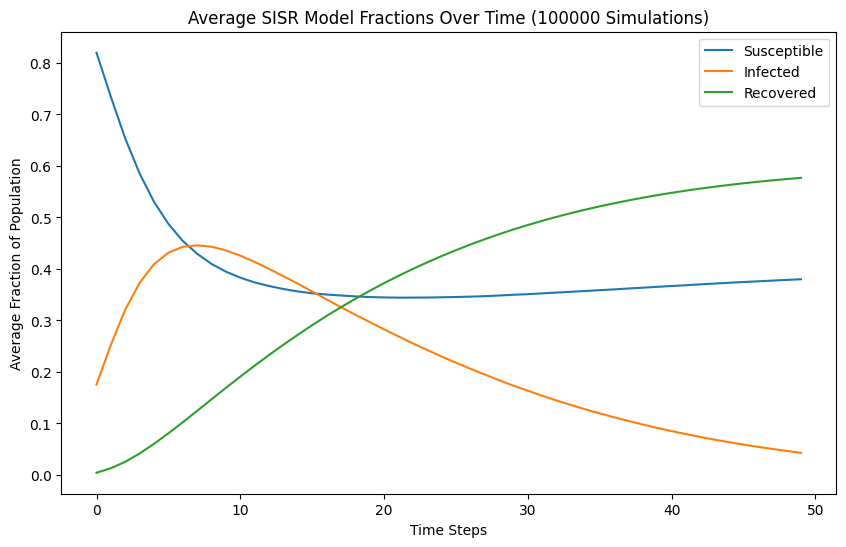

In [ ]:
# Fraction graph with 100,000 simulations

def initialize_sisr_model(graph, initial_infected_fraction):
    num_nodes = graph.number_of_nodes()
    num_infected = int(initial_infected_fraction * num_nodes)

    infected_nodes = random.sample(graph.nodes, num_infected)
    susceptible_nodes = set(graph.nodes) - set(infected_nodes)
    recovered_nodes = set()

    sisr_model = {"graph": graph, "infected_nodes": set(infected_nodes), "susceptible_nodes": set(susceptible_nodes), "recovered_nodes": set(recovered_nodes)}

    return sisr_model

def run_sisr_simulation(sisr_model, num_steps, beta, gamma, delta):
    graph = sisr_model["graph"]
    infected_nodes = sisr_model["infected_nodes"]
    susceptible_nodes = sisr_model["susceptible_nodes"]
    recovered_nodes = sisr_model["recovered_nodes"]

    susceptible_fraction = []
    infected_fraction = []
    recovered_fraction = []

    for step in range(num_steps):
        new_infected_nodes = set()
        new_recovered_nodes = set()
        new_susceptible_nodes = set()

        for node in infected_nodes:
            if random.random() <= gamma + delta:
                if random.random() <= delta / (gamma + delta):
                    new_recovered_nodes.add(node)
                    recovered_nodes.update(new_recovered_nodes)
                else:
                    new_susceptible_nodes.add(node)
                    susceptible_nodes.update(new_susceptible_nodes)
                continue

            neighbors = set(graph.neighbors(node)) - recovered_nodes
            num_neighbors_to_infect = min(int(beta), len(neighbors))
            neighbors_to_infect = random.sample(neighbors, num_neighbors_to_infect)
            new_infected_nodes.update(neighbors_to_infect)

        infected_nodes.update(new_infected_nodes)
        infected_nodes -= recovered_nodes
        infected_nodes -= new_susceptible_nodes
        susceptible_nodes -= infected_nodes

        # Calculate fractions
        total_nodes = graph.number_of_nodes()
        susceptible_fraction.append(len(susceptible_nodes) / total_nodes)
        infected_fraction.append(len(infected_nodes) / total_nodes)
        recovered_fraction.append(len(recovered_nodes) / total_nodes)


    return susceptible_fraction, infected_fraction, recovered_fraction

if __name__ == "__main__":
    karate_club = nx.karate_club_graph()
    initial_infected_fraction = 0.1

    # Run 100 simulations of SISR model
    num_simulations = 100000
    num_steps = 50
    beta = 2.6   # infection rate
    gamma = 0.2  # recover rate
    delta = 0.05  # immunity rate

    # Run multiple simulations
    avg_susceptible = np.zeros(num_steps)
    avg_infected = np.zeros(num_steps)
    avg_recovered = np.zeros(num_steps)

    for _ in range(num_simulations):
        # Initialize SISR model
        sisr_model = initialize_sisr_model(karate_club, initial_infected_fraction)

        # Run SISR model
        susceptible, infected, recovered = run_sisr_simulation(sisr_model, num_steps, beta, gamma, delta)

        # Accumulate results
        avg_susceptible += susceptible
        avg_infected += infected
        avg_recovered += recovered

    # Calculate average fractions
    avg_susceptible /= num_simulations
    avg_infected /= num_simulations
    avg_recovered /= num_simulations


    # Plot the average fractions
    plt.figure(figsize=(10, 6))
    plt.plot(range(num_steps), avg_susceptible, label='Susceptible')
    plt.plot(range(num_steps), avg_infected, label='Infected')
    plt.plot(range(num_steps), avg_recovered, label='Recovered')
    plt.xlabel('Time Steps')
    plt.ylabel('Average Fraction of Population')
    plt.title(f'Average SISR Model Fractions Over Time (100000 Simulations)')
    plt.legend()
    plt.show()


_______________________________________________________________________________



<ipython-input-3-964c2ca1e477>:8: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  infected_nodes = random.sample(graph.nodes, num_infected)
<ipython-input-3-964c2ca1e477>:46: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  neighbors_to_infect = random.sample(neighbors, num_neighbors_to_infect)


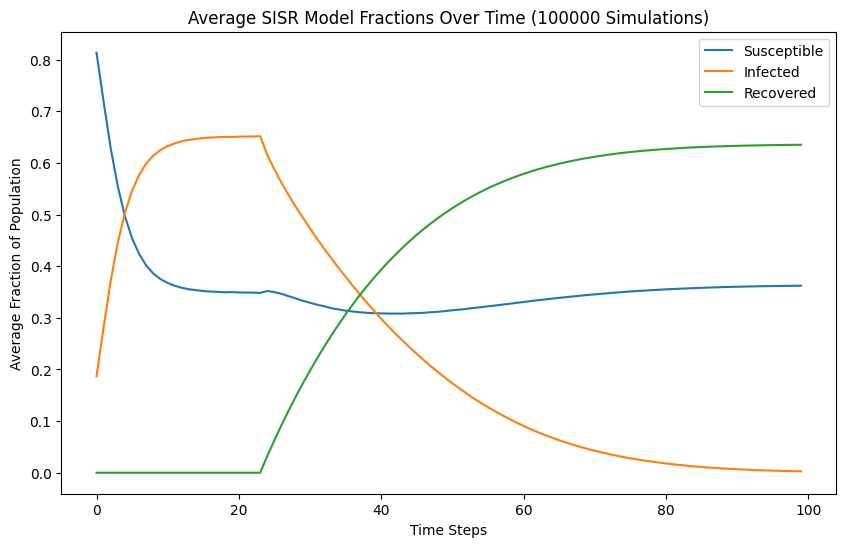

In [ ]:
# Delay of a cure for 25 time steps
# Fraction graph with 100,000 simulations

def initialize_sisr_model(graph, initial_infected_fraction):
    num_nodes = graph.number_of_nodes()
    num_infected = int(initial_infected_fraction * num_nodes)

    infected_nodes = random.sample(graph.nodes, num_infected)
    susceptible_nodes = set(graph.nodes) - set(infected_nodes)
    recovered_nodes = set()

    sisr_model = {"graph": graph, "infected_nodes": set(infected_nodes), "susceptible_nodes": set(susceptible_nodes), "recovered_nodes": set(recovered_nodes)}

    return sisr_model

def run_sisr_simulation(sisr_model, num_steps, beta, gamma, delta):
    graph = sisr_model["graph"]
    infected_nodes = sisr_model["infected_nodes"]
    susceptible_nodes = sisr_model["susceptible_nodes"]
    recovered_nodes = sisr_model["recovered_nodes"]

    susceptible_fraction = []
    infected_fraction = []
    recovered_fraction = []

    for step in range(num_steps):
        new_infected_nodes = set()
        new_recovered_nodes = set()
        new_susceptible_nodes = set()

        if(step == 24):
            delta = 0.05

        for node in infected_nodes:
            if random.random() <= gamma + delta:
                if random.random() <= delta / (gamma + delta):
                    new_recovered_nodes.add(node)
                    recovered_nodes.update(new_recovered_nodes)
                else:
                    new_susceptible_nodes.add(node)
                    susceptible_nodes.update(new_susceptible_nodes)
                continue

            neighbors = set(graph.neighbors(node)) - recovered_nodes
            num_neighbors_to_infect = min(int(beta), len(neighbors))
            neighbors_to_infect = random.sample(neighbors, num_neighbors_to_infect)
            new_infected_nodes.update(neighbors_to_infect)

        infected_nodes.update(new_infected_nodes)
        infected_nodes -= recovered_nodes
        infected_nodes -= new_susceptible_nodes
        susceptible_nodes -= infected_nodes

        # Calculate fractions
        total_nodes = graph.number_of_nodes()
        susceptible_fraction.append(len(susceptible_nodes) / total_nodes)
        infected_fraction.append(len(infected_nodes) / total_nodes)
        recovered_fraction.append(len(recovered_nodes) / total_nodes)


    return susceptible_fraction, infected_fraction, recovered_fraction

if __name__ == "__main__":
    karate_club = nx.karate_club_graph()
    initial_infected_fraction = 0.1

    # Run 100 simulations of SISR model
    num_simulations = 100000
    num_steps = 100
    beta = 2.6   # infection rate
    gamma = 0.2  # recover rate
    delta = 0.00  # immunity rate

    # Run multiple simulations
    avg_susceptible = np.zeros(num_steps)
    avg_infected = np.zeros(num_steps)
    avg_recovered = np.zeros(num_steps)

    for _ in range(num_simulations):
        # Initialize SISR model
        sisr_model = initialize_sisr_model(karate_club, initial_infected_fraction)

        # Run SISR model
        susceptible, infected, recovered = run_sisr_simulation(sisr_model, num_steps, beta, gamma, delta)

        # Accumulate results
        avg_susceptible += susceptible
        avg_infected += infected
        avg_recovered += recovered

    # Calculate average fractions
    avg_susceptible /= num_simulations
    avg_infected /= num_simulations
    avg_recovered /= num_simulations


    # Plot the average fractions
    plt.figure(figsize=(10, 6))
    plt.plot(range(num_steps), avg_susceptible, label='Susceptible')
    plt.plot(range(num_steps), avg_infected, label='Infected')
    plt.plot(range(num_steps), avg_recovered, label='Recovered')
    plt.xlabel('Time Steps')
    plt.ylabel('Average Fraction of Population')
    plt.title(f'Average SISR Model Fractions Over Time (100000 Simulations)')
    plt.legend()
    plt.show()

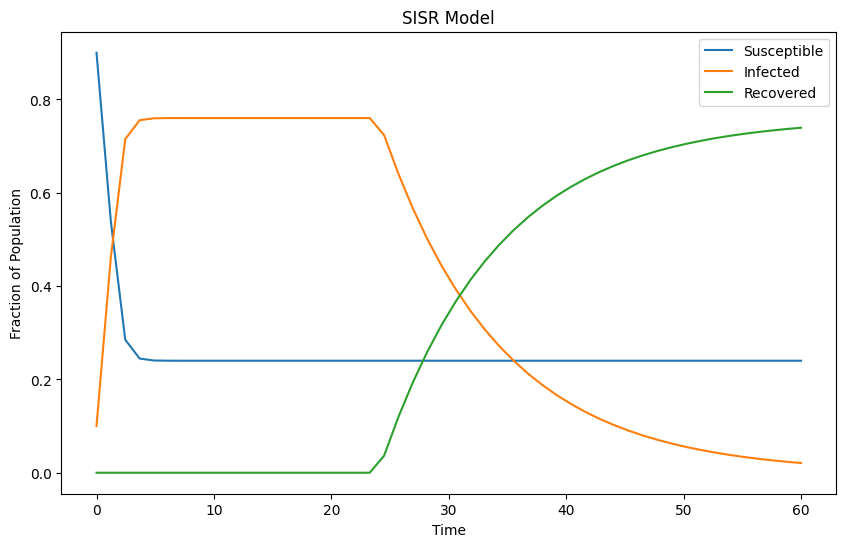

In [ ]:
# Define the SISR model equations
# Delay cure for 24 steps
def sisr_model(y, t, beta, gamma, delta):
    s, x, r = y

    beta = beta_func(t)
    gamma = gamma_func(t)
    delta = delta_func(t)

    dsdt = gamma * x - beta * s * x
    dxdt = beta * s * x - (gamma + delta) * x
    drdt = delta * x
    return [dsdt, dxdt, drdt]

def beta_func(t):
    return 2.5

def gamma_func(t):
    return 0.6

def delta_func(t):
    if(t > 24):
        return 0.1

    return 0

# Set the initial conditions and parameters
s0 = 0.90
x0 = 0.10
r0 = 0.0
#beta = 2.0
#gamma = 0.6
#delta = 0.1

# Set the time points
t = np.linspace(0, 60)

# Solve the SISR equations using odeint
solution = odeint(sisr_model, [s0, x0, r0], t, args=(beta, gamma, delta))

# Extract the results for each state
susceptible, infected, recovered = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, susceptible, label='Susceptible')
plt.plot(t, infected, label='Infected')
plt.plot(t, recovered, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Fraction of Population')
plt.title('SISR Model')
plt.legend()
plt.show()


_____________________________________________________________________________________________________________________________________________

<ipython-input-7-773775f57022>:10: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  infected_nodes = random.sample(graph.nodes, num_infected)
<ipython-input-7-773775f57022>:71: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  neighbors_to_infect = random.sample(neighbors, num_neighbors_to_infect)


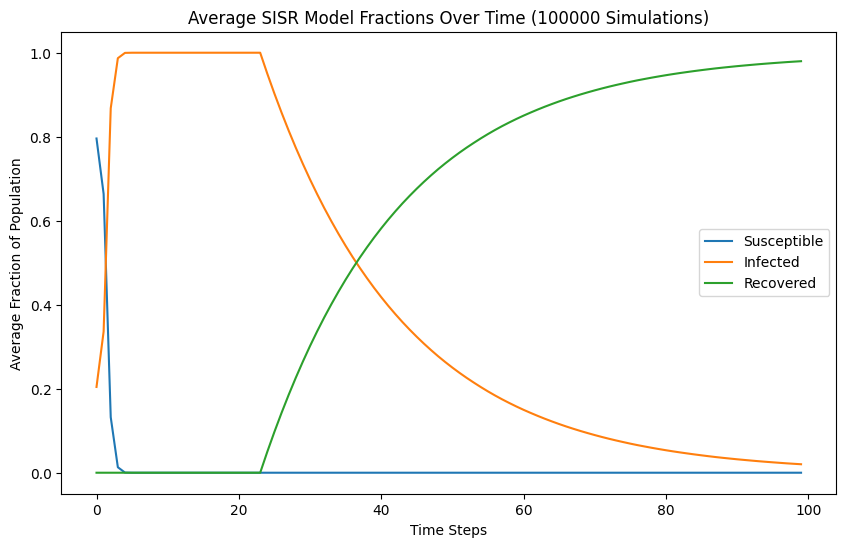

In [ ]:
# Stacking of diseas with outbreak at 3
# Math represantion missing
# Delay of a cure for 25 time steps
# Fraction graph with 100,000 simulations
# Neighbor infections present

def initialize_sisr_model(graph, initial_infected_fraction):
    num_nodes = graph.number_of_nodes()
    num_infected = int(initial_infected_fraction * num_nodes)

    infected_nodes = random.sample(graph.nodes, num_infected)
    susceptible_nodes = set(graph.nodes) - set(infected_nodes)
    recovered_nodes = set()

    nx.set_node_attributes(graph, 0, "disease_counters")

    sisr_model = {"graph": graph, "infected_nodes": set(infected_nodes), "susceptible_nodes": set(susceptible_nodes), "recovered_nodes": set(recovered_nodes)}

    return sisr_model

def outbreak(sisr_model, node, outbreak_nodes=None):
    if outbreak_nodes is None:
        outbreak_nodes = set()  # Initialize the set of nodes that have had an outbreak

    outbreak_nodes.add(node)  # Add the current node to the set

    connected_nodes = sisr_model["graph"].neighbors(node)

    for cn in connected_nodes:
        if cn not in outbreak_nodes:  # Only process the node if it hasn't had an outbreak yet
            if(sisr_model["graph"].nodes[cn]['disease_counters'] == 3):
                outbreak(sisr_model, cn, outbreak_nodes)
            else:
                sisr_model["graph"].nodes[cn]['disease_counters'] += 1
                if(sisr_model["graph"].nodes[cn]['disease_counters'] == 3):
                    outbreak(sisr_model, cn, outbreak_nodes)

def run_sisr_simulation(sisr_model, num_steps, beta, gamma, delta):
    graph = sisr_model["graph"]
    infected_nodes = sisr_model["infected_nodes"]
    susceptible_nodes = sisr_model["susceptible_nodes"]
    recovered_nodes = sisr_model["recovered_nodes"]

    susceptible_fraction = []
    infected_fraction = []
    recovered_fraction = []

    for step in range(num_steps):
        new_infected_nodes = set()
        new_recovered_nodes = set()
        new_susceptible_nodes = set()

        if(step == 24):
            delta = 0.05

        for node in infected_nodes:
            if random.random() <= gamma + delta:
                if random.random() <= delta / (gamma + delta):
                    graph.nodes[node]["disease_counters"] = 0
                    new_recovered_nodes.add(node)
                    recovered_nodes.update(new_recovered_nodes)
                else:
                    graph.nodes[node]["disease_counters"] -= 1

                    if graph.nodes[node]["disease_counters"] == 0:
                        new_susceptible_nodes.add(node)
                        susceptible_nodes.update(new_susceptible_nodes)
                continue

            neighbors = set(graph.neighbors(node)) - recovered_nodes
            num_neighbors_to_infect = min(int(beta), len(neighbors))
            neighbors_to_infect = random.sample(neighbors, num_neighbors_to_infect)
            new_infected_nodes.update(neighbors_to_infect)

        # Update disease counters for each infected node
        for node in infected_nodes:
            if(graph.nodes[node]['disease_counters'] == 3):
                outbreak(sisr_model, node)
            else :
                graph.nodes[node]['disease_counters'] += 1

                if(graph.nodes[node]['disease_counters'] == 3):
                    outbreak(sisr_model, node)

        for node in graph.nodes:
            if graph.nodes[node]["disease_counters"] > 0:
                new_infected_nodes.add(node)

        infected_nodes.update(new_infected_nodes)
        infected_nodes -= recovered_nodes
        infected_nodes -= new_susceptible_nodes
        susceptible_nodes -= infected_nodes

        # Calculate fractions
        total_nodes = graph.number_of_nodes()
        susceptible_fraction.append(len(susceptible_nodes) / total_nodes)
        infected_fraction.append(len(infected_nodes) / total_nodes)
        recovered_fraction.append(len(recovered_nodes) / total_nodes)


    return susceptible_fraction, infected_fraction, recovered_fraction

if __name__ == "__main__":
    karate_club = nx.karate_club_graph()
    initial_infected_fraction = 0.1

    # Run 100 simulations of SISR model
    num_simulations = 100000
    num_steps = 100
    beta = 2.6   # infection rate
    gamma = 0.2  # recover rate
    delta = 0.00  # immunity rate

    # Run multiple simulations
    avg_susceptible = np.zeros(num_steps)
    avg_infected = np.zeros(num_steps)
    avg_recovered = np.zeros(num_steps)

    for _ in range(num_simulations):
        # Initialize SISR model
        sisr_model = initialize_sisr_model(karate_club, initial_infected_fraction)

        # Run SISR model
        susceptible, infected, recovered = run_sisr_simulation(sisr_model, num_steps, beta, gamma, delta)

        # Accumulate results
        avg_susceptible += susceptible
        avg_infected += infected
        avg_recovered += recovered

    # Calculate average fractions
    avg_susceptible /= num_simulations
    avg_infected /= num_simulations
    avg_recovered /= num_simulations


    # Plot the average fractions
    plt.figure(figsize=(10, 6))
    plt.plot(range(num_steps), avg_susceptible, label='Susceptible')
    plt.plot(range(num_steps), avg_infected, label='Infected')
    plt.plot(range(num_steps), avg_recovered, label='Recovered')
    plt.xlabel('Time Steps')
    plt.ylabel('Average Fraction of Population')
    plt.title(f'Average SISR Model Fractions Over Time (100000 Simulations)')
    plt.legend()
    plt.show()

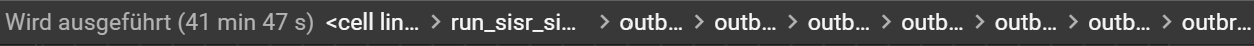

<ipython-input-5-4da14e6138f5>:10: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  infected_nodes = random.sample(graph.nodes, num_infected)


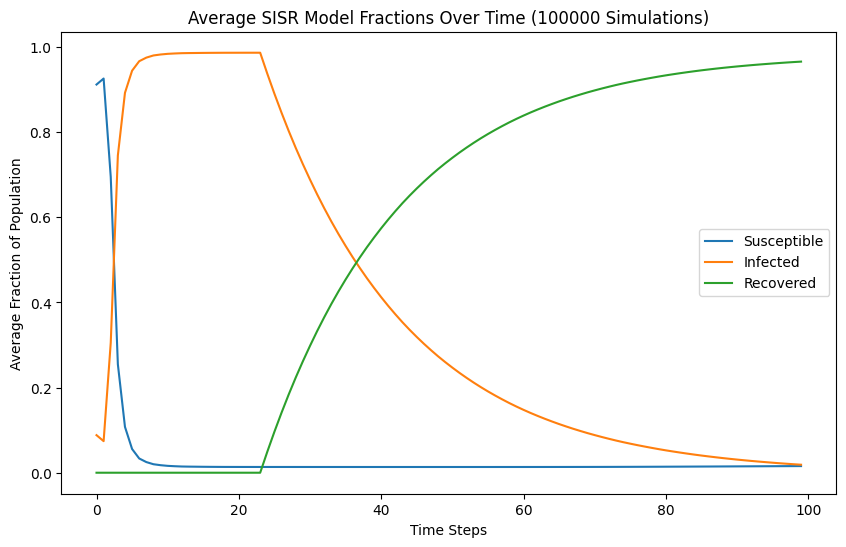

In [ ]:
# Stacking of diseas with outbreak at 3
# Math represantion missing
# Delay of a cure for 25 time steps
# Fraction graph with 100,000 simulations

def initialize_sisr_model(graph, initial_infected_fraction):
    num_nodes = graph.number_of_nodes()
    num_infected = int(initial_infected_fraction * num_nodes)

    infected_nodes = random.sample(graph.nodes, num_infected)
    susceptible_nodes = set(graph.nodes) - set(infected_nodes)
    recovered_nodes = set()

    nx.set_node_attributes(graph, 0, "disease_counters")

    sisr_model = {"graph": graph, "infected_nodes": set(infected_nodes), "susceptible_nodes": set(susceptible_nodes), "recovered_nodes": set(recovered_nodes)}

    return sisr_model

def outbreak(sisr_model, node, outbreak_nodes=None):
    if outbreak_nodes is None:
        outbreak_nodes = set()  # Initialize the set of nodes that have had an outbreak

    outbreak_nodes.add(node)  # Add the current node to the set

    connected_nodes = sisr_model["graph"].neighbors(node)

    for cn in connected_nodes:
        if cn not in outbreak_nodes:  # Only process the node if it hasn't had an outbreak yet
            if(sisr_model["graph"].nodes[cn]['disease_counters'] == 3):
                outbreak(sisr_model, cn, outbreak_nodes)
            else:
                sisr_model["graph"].nodes[cn]['disease_counters'] += 1
                if(sisr_model["graph"].nodes[cn]['disease_counters'] == 3):
                    outbreak(sisr_model, cn, outbreak_nodes)

def run_sisr_simulation(sisr_model, num_steps, beta, gamma, delta):
    graph = sisr_model["graph"]
    infected_nodes = sisr_model["infected_nodes"]
    susceptible_nodes = sisr_model["susceptible_nodes"]
    recovered_nodes = sisr_model["recovered_nodes"]

    susceptible_fraction = []
    infected_fraction = []
    recovered_fraction = []

    for step in range(num_steps):
        new_infected_nodes = set()
        new_recovered_nodes = set()
        new_susceptible_nodes = set()

        if(step == 24):
            delta = 0.05

        for node in infected_nodes:
            if random.random() <= gamma + delta:
                if random.random() <= delta / (gamma + delta):
                    graph.nodes[node]["disease_counters"] = 0
                    new_recovered_nodes.add(node)
                    recovered_nodes.update(new_recovered_nodes)
                else:
                    graph.nodes[node]["disease_counters"] -= 1

                    if graph.nodes[node]["disease_counters"] == 0:
                        new_susceptible_nodes.add(node)
                        susceptible_nodes.update(new_susceptible_nodes)
                continue

            # Update disease counters for each infected node
            if(graph.nodes[node]['disease_counters'] == 3):
                outbreak(sisr_model, node)
            else :
                graph.nodes[node]['disease_counters'] += 1

                if(graph.nodes[node]['disease_counters'] == 3):
                    outbreak(sisr_model, node)

        for node in graph.nodes:
            if graph.nodes[node]["disease_counters"] > 0:
                new_infected_nodes.add(node)

        infected_nodes.update(new_infected_nodes)
        infected_nodes -= recovered_nodes
        infected_nodes -= new_susceptible_nodes
        susceptible_nodes -= infected_nodes

        # Calculate fractions
        total_nodes = graph.number_of_nodes()
        susceptible_fraction.append(len(susceptible_nodes) / total_nodes)
        infected_fraction.append(len(infected_nodes) / total_nodes)
        recovered_fraction.append(len(recovered_nodes) / total_nodes)


    return susceptible_fraction, infected_fraction, recovered_fraction

if __name__ == "__main__":
    karate_club = nx.karate_club_graph()
    initial_infected_fraction = 0.1

    # Run 100 simulations of SISR model
    num_simulations = 100000
    num_steps = 100
    beta = 2.6   # infection rate
    gamma = 0.2  # recover rate
    delta = 0.00  # immunity rate

    # Run multiple simulations
    avg_susceptible = np.zeros(num_steps)
    avg_infected = np.zeros(num_steps)
    avg_recovered = np.zeros(num_steps)

    for _ in range(num_simulations):
        # Initialize SISR model
        sisr_model = initialize_sisr_model(karate_club, initial_infected_fraction)

        # Run SISR model
        susceptible, infected, recovered = run_sisr_simulation(sisr_model, num_steps, beta, gamma, delta)

        # Accumulate results
        avg_susceptible += susceptible
        avg_infected += infected
        avg_recovered += recovered

    # Calculate average fractions
    avg_susceptible /= num_simulations
    avg_infected /= num_simulations
    avg_recovered /= num_simulations


    # Plot the average fractions
    plt.figure(figsize=(10, 6))
    plt.plot(range(num_steps), avg_susceptible, label='Susceptible')
    plt.plot(range(num_steps), avg_infected, label='Infected')
    plt.plot(range(num_steps), avg_recovered, label='Recovered')
    plt.xlabel('Time Steps')
    plt.ylabel('Average Fraction of Population')
    plt.title(f'Average SISR Model Fractions Over Time (100000 Simulations)')
    plt.legend()
    plt.show()

In [ ]:
# Stacking of diseas with outbreak at 3
# Math represantion missing
# Delay of a cure for 25 time steps
# Fraction graph with 100,000 simulations

def initialize_sisr_model(graph, initial_infected_fraction):
    num_nodes = graph.number_of_nodes()
    num_infected = int(initial_infected_fraction * num_nodes)

    infected_nodes = random.sample(graph.nodes, num_infected)
    susceptible_nodes = set(graph.nodes) - set(infected_nodes)
    recovered_nodes = set()

    nx.set_node_attributes(graph, 0, "disease_counters")

    for node in infected_nodes:
        graph.nodes[node]["disease_counters"] = 1

    sisr_model = {"graph": graph, "infected_nodes": set(infected_nodes), "susceptible_nodes": set(susceptible_nodes), "recovered_nodes": set(recovered_nodes)}

    return sisr_model

def plot_sisr_graph(sisr_model, title):
    graph = sisr_model["graph"]
    pos = nx.spring_layout(graph)
    infected_nodes = sisr_model["infected_nodes"]
    recovered_nodes = sisr_model["recovered_nodes"]

    # Draw nodes with different colors based on their state
    node_colors = ['red' if node in infected_nodes else 'green' if node in recovered_nodes else 'blue' for node in graph.nodes]
    nx.draw(graph, pos, with_labels=True, font_weight='bold', node_color=node_colors)

    # Draw disease counters above each node
    for node, (x, y) in pos.items():
        counter = graph.nodes[node]["disease_counters"]

        # Construct label for the counter
        counter_label = f"{counter}"

        # Draw the text for the counter above the node
        plt.text(x, y + 0.06, counter_label, fontsize=8, ha='center', va='center', color='purple', weight='bold')

    plt.title(title)
    plt.show()

def outbreak(sisr_model, node, outbreak_nodes=None):
    if outbreak_nodes is None:
        outbreak_nodes = set()  # Initialize the set of nodes that have had an outbreak

    outbreak_nodes.add(node)  # Add the current node to the set

    connected_nodes = sisr_model["graph"].neighbors(node)

    for cn in connected_nodes:
        if cn not in outbreak_nodes:  # Only process the node if it hasn't had an outbreak yet
            if(sisr_model["graph"].nodes[cn]['disease_counters'] == 3):
                outbreak(sisr_model, cn, outbreak_nodes)
            else:
                sisr_model["graph"].nodes[cn]['disease_counters'] += 1
                if(sisr_model["graph"].nodes[cn]['disease_counters'] == 3):
                    outbreak(sisr_model, cn, outbreak_nodes)

def run_sisr_simulation(sisr_model, num_steps, beta, gamma, delta):
    graph = sisr_model["graph"]
    infected_nodes = sisr_model["infected_nodes"]
    susceptible_nodes = sisr_model["susceptible_nodes"]
    recovered_nodes = sisr_model["recovered_nodes"]

    susceptible_fraction = []
    infected_fraction = []
    recovered_fraction = []

    for step in range(num_steps):
        new_infected_nodes = set()
        new_recovered_nodes = set()
        new_susceptible_nodes = set()

        if(step == 24):
            delta = 0.05

        for node in infected_nodes:
            if random.random() <= gamma + delta:
                if random.random() <= delta / (gamma + delta):
                    graph.nodes[node]["disease_counters"] = 0
                    new_recovered_nodes.add(node)
                    recovered_nodes.update(new_recovered_nodes)
                else:
                    graph.nodes[node]["disease_counters"] -= 1

                    if graph.nodes[node]["disease_counters"] == 0:
                        new_susceptible_nodes.add(node)
                        susceptible_nodes.update(new_susceptible_nodes)
                continue

            # Update disease counters for each infected node
            if(graph.nodes[node]['disease_counters'] == 3):
                outbreak(sisr_model, node)
            else :
                graph.nodes[node]['disease_counters'] += 1

                if(graph.nodes[node]['disease_counters'] == 3):
                    outbreak(sisr_model, node)

        for node in graph.nodes:
            if graph.nodes[node]["disease_counters"] > 0:
                new_infected_nodes.add(node)

        infected_nodes.update(new_infected_nodes)
        infected_nodes -= recovered_nodes
        infected_nodes -= new_susceptible_nodes
        susceptible_nodes -= infected_nodes

        # Calculate fractions
        total_nodes = graph.number_of_nodes()
        susceptible_fraction.append(len(susceptible_nodes) / total_nodes)
        infected_fraction.append(len(infected_nodes) / total_nodes)
        recovered_fraction.append(len(recovered_nodes) / total_nodes)

        print(f"Step {step + 1}: Infected Nodes - {len(infected_nodes)}")
        plot_sisr_graph(sisr_model, f"SISR Model Simulation - Step {step + 1}")

    return susceptible_fraction, infected_fraction, recovered_fraction

if __name__ == "__main__":
    karate_club = nx.karate_club_graph()
    initial_infected_fraction = 0.1

    # Run 100 simulations of SISR model
    num_simulations = 1
    num_steps = 40
    beta = 2.6   # infection rate
    gamma = 0.2  # recover rate
    delta = 0.00  # immunity rate

    # Run multiple simulations
    avg_susceptible = np.zeros(num_steps)
    avg_infected = np.zeros(num_steps)
    avg_recovered = np.zeros(num_steps)

    for _ in range(num_simulations):
        # Initialize SISR model
        sisr_model = initialize_sisr_model(karate_club, initial_infected_fraction)

        # Run SISR model
        susceptible, infected, recovered = run_sisr_simulation(sisr_model, num_steps, beta, gamma, delta)

        # Accumulate results
        avg_susceptible += susceptible
        avg_infected += infected
        avg_recovered += recovered

    # Calculate average fractions
    avg_susceptible /= num_simulations
    avg_infected /= num_simulations
    avg_recovered /= num_simulations


    # Plot the average fractions
    plt.figure(figsize=(10, 6))
    plt.plot(range(num_steps), avg_susceptible, label='Susceptible')
    plt.plot(range(num_steps), avg_infected, label='Infected')
    plt.plot(range(num_steps), avg_recovered, label='Recovered')
    plt.xlabel('Time Steps')
    plt.ylabel('Average Fraction of Population')
    plt.title(f'Average SISR Model Fractions Over Time (1 Simulations)')
    plt.legend()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Stacking of diseas with outbreak at 3
# Math represantion missing
# Delay of a cure for 25 time steps
# Fraction graph with 100,000 simulations

def initialize_sisr_model(graph, initial_infected_fraction):
    num_nodes = graph.number_of_nodes()
    num_infected = int(initial_infected_fraction * num_nodes)

    infected_nodes = random.sample(graph.nodes, num_infected)
    susceptible_nodes = set(graph.nodes) - set(infected_nodes)
    recovered_nodes = set()

    nx.set_node_attributes(graph, 0, "disease_counters")

    for node in infected_nodes:
        graph.nodes[node]["disease_counters"] = 1

    sisr_model = {"graph": graph, "infected_nodes": set(infected_nodes), "susceptible_nodes": set(susceptible_nodes), "recovered_nodes": set(recovered_nodes)}

    return sisr_model

def plot_sisr_graph(sisr_model, title):
    graph = sisr_model["graph"]
    pos = nx.spring_layout(graph)
    infected_nodes = sisr_model["infected_nodes"]
    recovered_nodes = sisr_model["recovered_nodes"]

    # Draw nodes with different colors based on their state
    node_colors = ['red' if node in infected_nodes else 'green' if node in recovered_nodes else 'blue' for node in graph.nodes]
    nx.draw(graph, pos, with_labels=True, font_weight='bold', node_color=node_colors)

    # Draw disease counters above each node
    for node, (x, y) in pos.items():
        counter = graph.nodes[node]["disease_counters"]

        # Construct label for the counter
        counter_label = f"{counter}"

        # Draw the text for the counter above the node
        plt.text(x, y + 0.06, counter_label, fontsize=8, ha='center', va='center', color='purple', weight='bold')

    plt.title(title)
    plt.show()

def outbreak(sisr_model, node, outbreak_nodes=None):
    if outbreak_nodes is None:
        outbreak_nodes = set()  # Initialize the set of nodes that have had an outbreak

    outbreak_nodes.add(node)  # Add the current node to the set

    connected_nodes = sisr_model["graph"].neighbors(node)

    for cn in connected_nodes:
        if cn not in outbreak_nodes:  # Only process the node if it hasn't had an outbreak yet
            if(sisr_model["graph"].nodes[cn]['disease_counters'] == 3):
                outbreak(sisr_model, cn, outbreak_nodes)
            else:
                sisr_model["graph"].nodes[cn]['disease_counters'] += 1
                if(sisr_model["graph"].nodes[cn]['disease_counters'] == 3):
                    outbreak(sisr_model, cn, outbreak_nodes)

def run_sisr_simulation(sisr_model, num_steps, beta, gamma, delta):
    graph = sisr_model["graph"]
    infected_nodes = sisr_model["infected_nodes"]
    susceptible_nodes = sisr_model["susceptible_nodes"]
    recovered_nodes = sisr_model["recovered_nodes"]

    susceptible_fraction = []
    infected_fraction = []
    recovered_fraction = []

    for step in range(num_steps):
        new_infected_nodes = set()
        new_recovered_nodes = set()
        new_susceptible_nodes = set()

        if(step == 24):
            delta = 0.05

        for node in infected_nodes:
            if random.random() <= gamma + delta:
                if random.random() <= delta / (gamma + delta):
                    graph.nodes[node]["disease_counters"] = 0
                    new_recovered_nodes.add(node)
                    recovered_nodes.update(new_recovered_nodes)
                else:
                    graph.nodes[node]["disease_counters"] -= 1

                    if graph.nodes[node]["disease_counters"] == 0:
                        new_susceptible_nodes.add(node)
                        susceptible_nodes.update(new_susceptible_nodes)
                continue

            # Update disease counters for each infected node
            if(graph.nodes[node]['disease_counters'] == 3):
                outbreak(sisr_model, node)
            else :
                graph.nodes[node]['disease_counters'] += 1

                #if(graph.nodes[node]['disease_counters'] == 3):
                    #outbreak(sisr_model, node)

        for node in graph.nodes:
            if graph.nodes[node]["disease_counters"] > 0:
                new_infected_nodes.add(node)

        infected_nodes.update(new_infected_nodes)
        infected_nodes -= recovered_nodes
        infected_nodes -= new_susceptible_nodes
        susceptible_nodes -= infected_nodes

        # Calculate fractions
        total_nodes = graph.number_of_nodes()
        susceptible_fraction.append(len(susceptible_nodes) / total_nodes)
        infected_fraction.append(len(infected_nodes) / total_nodes)
        recovered_fraction.append(len(recovered_nodes) / total_nodes)

        print(f"Step {step + 1}: Infected Nodes - {len(infected_nodes)}")
        plot_sisr_graph(sisr_model, f"SISR Model Simulation - Step {step + 1}")

    return susceptible_fraction, infected_fraction, recovered_fraction

if __name__ == "__main__":
    karate_club = nx.karate_club_graph()
    initial_infected_fraction = 0.1

    # Run 100 simulations of SISR model
    num_simulations = 1
    num_steps = 40
    beta = 2.6   # infection rate
    gamma = 0.2  # recover rate
    delta = 0.00  # immunity rate

    # Run multiple simulations
    avg_susceptible = np.zeros(num_steps)
    avg_infected = np.zeros(num_steps)
    avg_recovered = np.zeros(num_steps)

    for _ in range(num_simulations):
        # Initialize SISR model
        sisr_model = initialize_sisr_model(karate_club, initial_infected_fraction)

        # Run SISR model
        susceptible, infected, recovered = run_sisr_simulation(sisr_model, num_steps, beta, gamma, delta)

        # Accumulate results
        avg_susceptible += susceptible
        avg_infected += infected
        avg_recovered += recovered

    # Calculate average fractions
    avg_susceptible /= num_simulations
    avg_infected /= num_simulations
    avg_recovered /= num_simulations


    # Plot the average fractions
    plt.figure(figsize=(10, 6))
    plt.plot(range(num_steps), avg_susceptible, label='Susceptible')
    plt.plot(range(num_steps), avg_infected, label='Infected')
    plt.plot(range(num_steps), avg_recovered, label='Recovered')
    plt.xlabel('Time Steps')
    plt.ylabel('Average Fraction of Population')
    plt.title(f'Average SISR Model Fractions Over Time (1 Simulations)')
    plt.legend()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Stacking of diseas with outbreak at 3
# Math represantion missing
# Delay of a cure for 25 time steps

def initialize_sisr_model(graph, initial_infected_fraction):
    num_nodes = graph.number_of_nodes()
    num_infected = int(initial_infected_fraction * num_nodes)

    infected_nodes = random.sample(graph.nodes, num_infected)
    susceptible_nodes = set(graph.nodes) - set(infected_nodes)
    recovered_nodes = set()

    nx.set_node_attributes(graph, 0, "disease_counters")

    for node in infected_nodes:
        graph.nodes[node]["disease_counters"] = 1

    sisr_model = {"graph": graph, "infected_nodes": set(infected_nodes), "susceptible_nodes": set(susceptible_nodes), "recovered_nodes": set(recovered_nodes)}

    return sisr_model

def plot_sisr_graph(sisr_model, title):
    graph = sisr_model["graph"]
    pos = nx.spring_layout(graph)
    infected_nodes = sisr_model["infected_nodes"]
    recovered_nodes = sisr_model["recovered_nodes"]

    # Draw nodes with different colors based on their state
    node_colors = ['red' if node in infected_nodes else 'green' if node in recovered_nodes else 'blue' for node in graph.nodes]
    nx.draw(graph, pos, with_labels=True, font_weight='bold', node_color=node_colors)

    # Draw disease counters above each node
    for node, (x, y) in pos.items():
        counter = graph.nodes[node]["disease_counters"]

        # Construct label for the counter
        counter_label = f"{counter}"

        # Draw the text for the counter above the node
        plt.text(x, y + 0.06, counter_label, fontsize=8, ha='center', va='center', color='purple', weight='bold')

    plt.title(title)
    plt.show()

def outbreak(sisr_model, node, outbreak_nodes=None):
    if outbreak_nodes is None:
        outbreak_nodes = set()  # Initialize the set of nodes that have had an outbreak

    outbreak_nodes.add(node)  # Add the current node to the set

    connected_nodes = sisr_model["graph"].neighbors(node)

    for cn in connected_nodes:
        if cn not in outbreak_nodes:  # Only process the node if it hasn't had an outbreak yet
            if(sisr_model["graph"].nodes[cn]['disease_counters'] == 3):
                outbreak(sisr_model, cn, outbreak_nodes)
            else:
                sisr_model["graph"].nodes[cn]['disease_counters'] += 1
                if(sisr_model["graph"].nodes[cn]['disease_counters'] == 3):
                    outbreak(sisr_model, cn, outbreak_nodes)

def run_sisr_simulation(sisr_model, num_steps, beta, gamma, delta):
    graph = sisr_model["graph"]
    infected_nodes = sisr_model["infected_nodes"]
    susceptible_nodes = sisr_model["susceptible_nodes"]
    recovered_nodes = sisr_model["recovered_nodes"]

    susceptible_fraction = []
    infected_fraction = []
    recovered_fraction = []

    for step in range(num_steps):
        new_infected_nodes = set()
        new_recovered_nodes = set()
        new_susceptible_nodes = set()

        if(step == 24):
            delta = 0.05

        nodes_to_increase_counter = random.sample(graph.nodes, int(beta))
        for node in nodes_to_increase_counter:
            # Update disease counters for each infected node
            if(graph.nodes[node]['disease_counters'] == 3):
                outbreak(sisr_model, node)
            else :
                graph.nodes[node]['disease_counters'] += 1

        for node in infected_nodes:
            if random.random() <= gamma + delta:
                if random.random() <= delta / (gamma + delta):
                    graph.nodes[node]["disease_counters"] = 0
                    new_recovered_nodes.add(node)
                    recovered_nodes.update(new_recovered_nodes)
                else:
                    graph.nodes[node]["disease_counters"] -= 1

                    if graph.nodes[node]["disease_counters"] == 0:
                        new_susceptible_nodes.add(node)
                        susceptible_nodes.update(new_susceptible_nodes)
                continue


        for node in graph.nodes:
            if graph.nodes[node]["disease_counters"] > 0:
                new_infected_nodes.add(node)

        infected_nodes.update(new_infected_nodes)
        infected_nodes -= recovered_nodes
        infected_nodes -= new_susceptible_nodes
        susceptible_nodes -= infected_nodes

        # Calculate fractions
        total_nodes = graph.number_of_nodes()
        susceptible_fraction.append(len(susceptible_nodes) / total_nodes)
        infected_fraction.append(len(infected_nodes) / total_nodes)
        recovered_fraction.append(len(recovered_nodes) / total_nodes)

        print(f"Step {step + 1}: Infected Nodes - {len(infected_nodes)}")
        plot_sisr_graph(sisr_model, f"SISR Model Simulation - Step {step + 1}")

    return susceptible_fraction, infected_fraction, recovered_fraction

if __name__ == "__main__":
    karate_club = nx.karate_club_graph()
    initial_infected_fraction = 0.1

    # Run 100 simulations of SISR model
    num_simulations = 1
    num_steps = 40
    beta = 2.6   # infection rate
    gamma = 0.2  # recover rate
    delta = 0.00  # immunity rate

    # Run multiple simulations
    avg_susceptible = np.zeros(num_steps)
    avg_infected = np.zeros(num_steps)
    avg_recovered = np.zeros(num_steps)

    for _ in range(num_simulations):
        # Initialize SISR model
        sisr_model = initialize_sisr_model(karate_club, initial_infected_fraction)

        # Run SISR model
        susceptible, infected, recovered = run_sisr_simulation(sisr_model, num_steps, beta, gamma, delta)

        # Accumulate results
        avg_susceptible += susceptible
        avg_infected += infected
        avg_recovered += recovered

    # Calculate average fractions
    avg_susceptible /= num_simulations
    avg_infected /= num_simulations
    avg_recovered /= num_simulations


    # Plot the average fractions
    plt.figure(figsize=(10, 6))
    plt.plot(range(num_steps), avg_susceptible, label='Susceptible')
    plt.plot(range(num_steps), avg_infected, label='Infected')
    plt.plot(range(num_steps), avg_recovered, label='Recovered')
    plt.xlabel('Time Steps')
    plt.ylabel('Average Fraction of Population')
    plt.title(f'Average SISR Model Fractions Over Time (1 Simulations)')
    plt.legend()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Stacking of diseas with outbreak at 3
# Math represantion missing
# Delay of a cure for 25 time steps
# Neighbour infections with beta

def initialize_sisr_model(graph, initial_infected_fraction):
    num_nodes = graph.number_of_nodes()
    num_infected = int(initial_infected_fraction * num_nodes)

    infected_nodes = random.sample(graph.nodes, num_infected)
    susceptible_nodes = set(graph.nodes) - set(infected_nodes)
    recovered_nodes = set()

    nx.set_node_attributes(graph, 0, "disease_counters")

    for node in infected_nodes:
        graph.nodes[node]["disease_counters"] = 1

    sisr_model = {"graph": graph, "infected_nodes": set(infected_nodes), "susceptible_nodes": set(susceptible_nodes), "recovered_nodes": set(recovered_nodes)}

    return sisr_model

def plot_sisr_graph(sisr_model, title):
    graph = sisr_model["graph"]
    pos = nx.spring_layout(graph)
    infected_nodes = sisr_model["infected_nodes"]
    recovered_nodes = sisr_model["recovered_nodes"]

    # Draw nodes with different colors based on their state
    node_colors = ['red' if node in infected_nodes else 'green' if node in recovered_nodes else 'blue' for node in graph.nodes]
    nx.draw(graph, pos, with_labels=True, font_weight='bold', node_color=node_colors)

    # Draw disease counters above each node
    for node, (x, y) in pos.items():
        counter = graph.nodes[node]["disease_counters"]

        # Construct label for the counter
        counter_label = f"{counter}"

        # Draw the text for the counter above the node
        plt.text(x, y + 0.06, counter_label, fontsize=8, ha='center', va='center', color='purple', weight='bold')

    plt.title(title)
    plt.show()

def outbreak(sisr_model, node, outbreak_nodes=None):
    if outbreak_nodes is None:
        outbreak_nodes = set()  # Initialize the set of nodes that have had an outbreak

    outbreak_nodes.add(node)  # Add the current node to the set

    connected_nodes = sisr_model["graph"].neighbors(node)

    for cn in connected_nodes:
        if cn not in outbreak_nodes:  # Only process the node if it hasn't had an outbreak yet
            if(sisr_model["graph"].nodes[cn]['disease_counters'] == 3):
                outbreak(sisr_model, cn, outbreak_nodes)
            else:
                sisr_model["graph"].nodes[cn]['disease_counters'] += 1
                if(sisr_model["graph"].nodes[cn]['disease_counters'] == 3):
                    outbreak(sisr_model, cn, outbreak_nodes)

def run_sisr_simulation(sisr_model, num_steps, beta, gamma, delta):
    graph = sisr_model["graph"]
    infected_nodes = sisr_model["infected_nodes"]
    susceptible_nodes = sisr_model["susceptible_nodes"]
    recovered_nodes = sisr_model["recovered_nodes"]

    susceptible_fraction = []
    infected_fraction = []
    recovered_fraction = []

    for step in range(num_steps):
        new_infected_nodes = set()
        new_recovered_nodes = set()
        new_susceptible_nodes = set()

        if(step == 24):
            delta = 0.05

        for node in infected_nodes:
            if random.random() <= gamma + delta:
                if random.random() <= delta / (gamma + delta):
                    graph.nodes[node]["disease_counters"] = 0
                    new_recovered_nodes.add(node)
                    recovered_nodes.update(new_recovered_nodes)
                else:
                    graph.nodes[node]["disease_counters"] -= 1

                    if graph.nodes[node]["disease_counters"] == 0:
                        new_susceptible_nodes.add(node)
                        susceptible_nodes.update(new_susceptible_nodes)
                continue

            neighbors = set(graph.neighbors(node)) - recovered_nodes
            num_neighbors_to_infect = min(int(beta), len(neighbors))
            neighbors_to_infect = random.sample(neighbors, num_neighbors_to_infect)
            new_infected_nodes.update(neighbors_to_infect)

        for neighbor in neighbors_to_infect:
            # Increment the disease counter until an outbreak occurs
            while graph.nodes[neighbor]["disease_counters"] < 3:
                graph.nodes[neighbor]["disease_counters"] += 1

                if graph.nodes[neighbor]["disease_counters"] == 3:
                    new_infected_nodes.add(neighbor)
                    outbreak(sisr_model, neighbor)

        for node in graph.nodes:
            if graph.nodes[node]["disease_counters"] > 0:
                new_infected_nodes.add(node)

        infected_nodes.update(new_infected_nodes)
        infected_nodes -= recovered_nodes
        infected_nodes -= new_susceptible_nodes
        susceptible_nodes -= infected_nodes

        # Calculate fractions
        total_nodes = graph.number_of_nodes()
        susceptible_fraction.append(len(susceptible_nodes) / total_nodes)
        infected_fraction.append(len(infected_nodes) / total_nodes)
        recovered_fraction.append(len(recovered_nodes) / total_nodes)

        print(f"Step {step + 1}: Infected Nodes - {len(infected_nodes)}")
        plot_sisr_graph(sisr_model, f"SISR Model Simulation - Step {step + 1}")

    return susceptible_fraction, infected_fraction, recovered_fraction

if __name__ == "__main__":
    karate_club = nx.karate_club_graph()
    initial_infected_fraction = 0.1

    # Run 100 simulations of SISR model
    num_simulations = 1
    num_steps = 40
    beta = 2.6   # infection rate
    gamma = 0.2  # recover rate
    delta = 0.00  # immunity rate

    # Run multiple simulations
    avg_susceptible = np.zeros(num_steps)
    avg_infected = np.zeros(num_steps)
    avg_recovered = np.zeros(num_steps)

    for _ in range(num_simulations):
        # Initialize SISR model
        sisr_model = initialize_sisr_model(karate_club, initial_infected_fraction)

        # Run SISR model
        susceptible, infected, recovered = run_sisr_simulation(sisr_model, num_steps, beta, gamma, delta)

        # Accumulate results
        avg_susceptible += susceptible
        avg_infected += infected
        avg_recovered += recovered

    # Calculate average fractions
    avg_susceptible /= num_simulations
    avg_infected /= num_simulations
    avg_recovered /= num_simulations


    # Plot the average fractions
    plt.figure(figsize=(10, 6))
    plt.plot(range(num_steps), avg_susceptible, label='Susceptible')
    plt.plot(range(num_steps), avg_infected, label='Infected')
    plt.plot(range(num_steps), avg_recovered, label='Recovered')
    plt.xlabel('Time Steps')
    plt.ylabel('Average Fraction of Population')
    plt.title(f'Average SISR Model Fractions Over Time (1 Simulations)')
    plt.legend()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

Are we randomly infecting nodes
Are we only taking the neighbours into consideration when infecting nodes with Beta if so how is the counter for the stacking increasing for the outbreaks

In [ ]:
# Multiple diseases